---
# Group Epochs

In [1]:
from linescanning import (
    utils,
    plotting,
    fitting,
    preproc,
)
import nibabel as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import holeresponse as hr
opj = os.path.join

In [2]:
# import subject dictionary containing useful information
subj_obj = hr.utils.SubjectsDict()
subj_obj.get_colors()

['#1B9E77', '#D95F02', '#4c75ff']

In [3]:
# get h5-file
deriv = "/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives"
repo_dir = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse"

incl_subjs = subj_obj.get_subjects()
excl = [
    # "sub-003",
    # "sub-008",
    # "sub-014"
]

h5_files = []
for i in incl_subjs:
    if not i in excl:
        ses = subj_obj.get_session(i)
        h5 = utils.FindFiles(opj(deriv, "lsprep", i), extension="h5").files

        if len(h5)>0:
            h5_filt = utils.get_file_from_substring([f"ses-{ses}","desc-0p"], h5)
            h5_files.append(h5_filt)
    
h5_files

['/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-001/sub-001_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-002/sub-002_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-003/sub-003_ses-5_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-005/sub-005_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-006/sub-006_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-008/sub-008_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-010/sub-010_ses-4_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-011/sub-011_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-013/sub-013_ses-2_d

In [4]:
# %matplotlib inline
# subj_list = subj_obj.get_subjects()
# ncols = 3
# nrows = int(np.ceil(len(subj_list)/ncols))

# fig,axs = plt.subplots(
#     ncols=ncols, 
#     nrows=nrows,
#     figsize=(ncols*4,nrows*3), 
#     constrained_layout=True
# )

# objs = {}
# for ix,ax in enumerate(axs.flatten()):

#     if (ix+1)>len(subj_list):
#         # remove obsolete axes
#         ax.remove()
#     else:
#         sub = subj_list[ix]
#         print(f"plotting '{sub}'")
#         png_obj = hr.viz.StimPNGs(sub)

#         if sub in excl:
#             f_col = "r"
#         else:
#             f_col = "k"
            
#         png_obj.generate_composite(
#             axs=ax, 
#             annotate=True, 
#             title={
#                 "title": sub, 
#                 "fontweight": "bold",
#                 "color": f_col
#             },
#             add_srf=True,
#             srf_kw={
#                 "x_label": "stimulus size",
#                 "y_label": "response",
#                 "font_size": 10
#             }
#         )

#         objs[sub] = png_obj

# # hr.viz._save_figure(fig, fname="group_desc-composite_stims", overwrite=True)

plotting 'sub-001'
plotting 'sub-002'
plotting 'sub-003'
plotting 'sub-005'
plotting 'sub-006'
plotting 'sub-008'
plotting 'sub-010'
plotting 'sub-011'
plotting 'sub-013'
plotting 'sub-014'


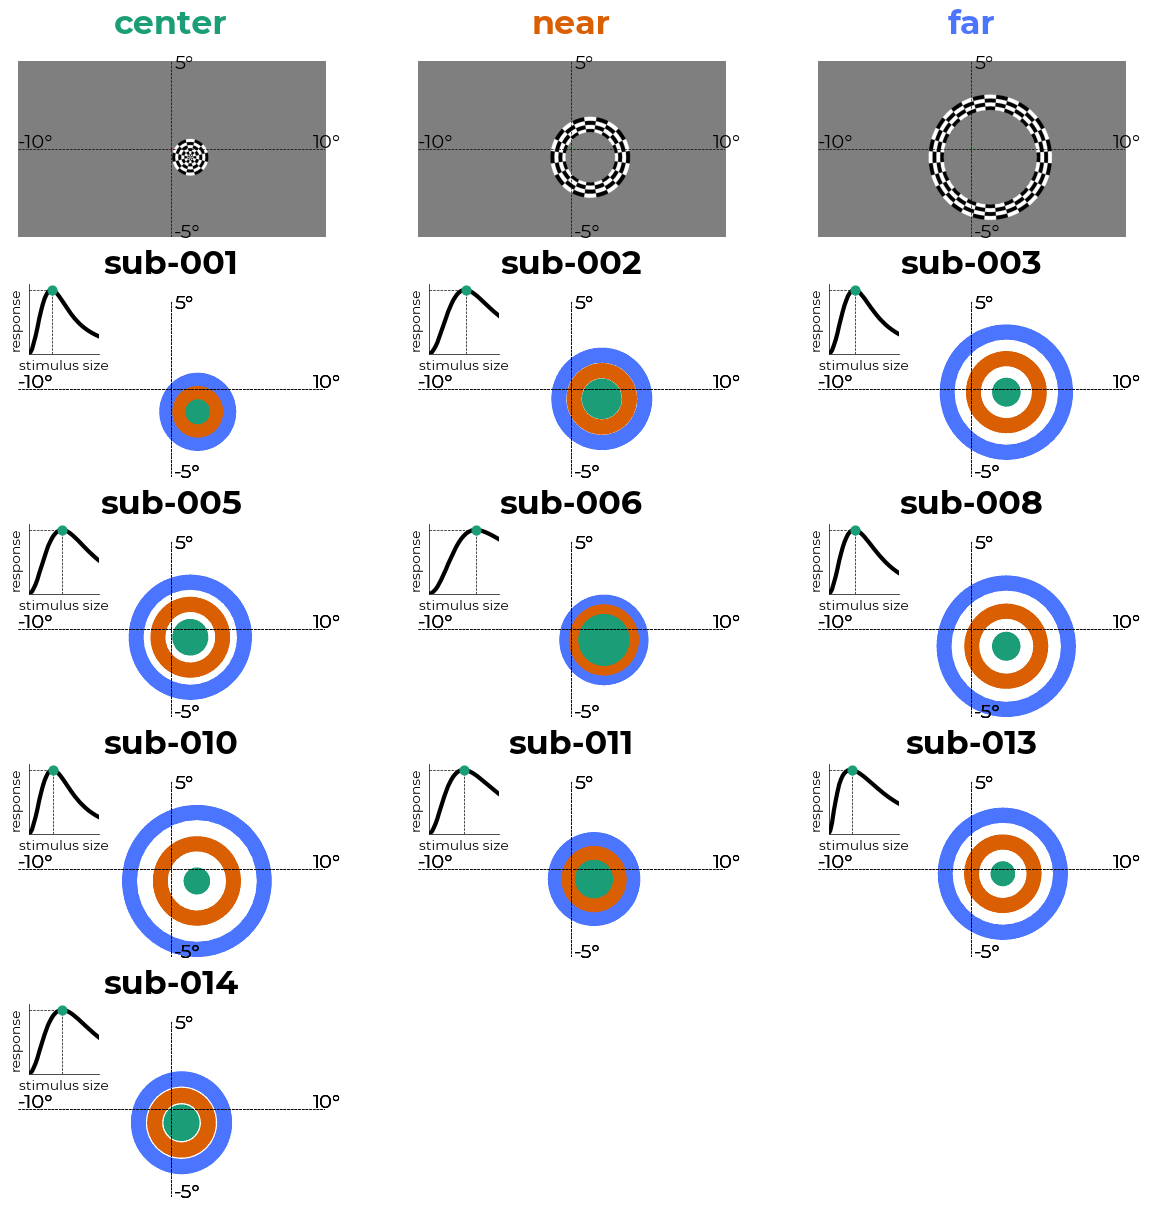

In [175]:
%matplotlib inline
subj_list = subj_obj.get_subjects()
ncols = 3
nrows = int(np.ceil(len(subj_list)/ncols))

fig,axs = plt.subplots(
    ncols=ncols,
    nrows=nrows+1,
    figsize=(12,12), 
    constrained_layout=True
)

axs_flat = axs.flatten()
ref_subj = "sub-005"
scr_obj = hr.viz.StimPNGs(ref_subj)
scr_obj.generate_screen_images(
    axs=axs_flat[:3], 
    annotate=True
)

objs = {}
for ix,ax in enumerate(axs_flat[3:]):

    if (ix+1)>len(subj_list):
        # remove obsolete axes
        ax.remove()
    else:
        sub = subj_list[ix]
        print(f"plotting '{sub}'")
        png_obj = hr.viz.StimPNGs(sub)

        if sub in excl:
            f_col = "r"
        else:
            f_col = "k"
            
        png_obj.generate_composite(
            axs=ax, 
            annotate=True, 
            title={
                "title": sub, 
                "fontweight": "bold",
                "color": f_col
            },
            add_srf=True,
            srf_kw={
                "x_label": "stimulus size",
                "y_label": "response",
                "font_size": 10
            }
        )

        objs[sub] = png_obj

# hr.viz._save_figure(fig, fname="group_desc-composite_stims", overwrite=True)

## Single subject test environment

In [5]:
subj = "sub-008"

h5_tmp = hr.data.H5Parser(
    utils.get_file_from_substring([subj], h5_files),
    verbose=True,
    compartments=20,
    lp_kw={
        "window_length": 17
    },
    lp=True
)

DATASET
Reading from /data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-008/sub-008_ses-3_desc-0p_bold.h5


 Set attribute: df_func_acomp
 Set attribute: df_func_psc
 Set attribute: df_func_raw
 Set attribute: df_onsets
 Set attribute: df_responses

DATASET: created
Fetching dataframe from attribute 'df_func_psc'
Low-pass filtering data with options: {'window_length': 17}
Making 20 GM-compartments
Making 5 WM-compartments
Done with 'sub-008'



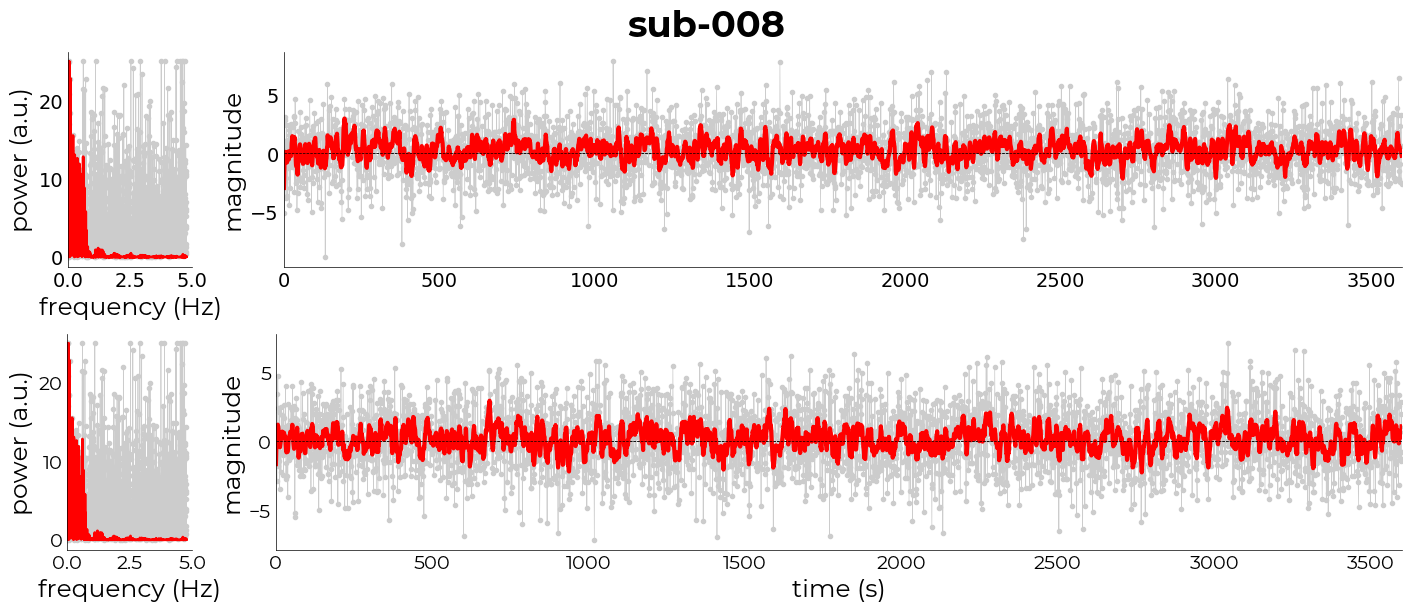

In [6]:
%matplotlib inline
sesID = subj_obj.get_session(subj)
ffig,avg = h5_tmp.plot_task_avg(
    orig=utils.select_from_df(h5_tmp.func, expression="ribbon", indices=subj_obj.get_ribbon(subj)),
    filt=h5_tmp.dict_ribbon[subj],
    plot_title={
        "title": subj,
        "fontweight": "bold"
    }
)

# hr.viz._save_figure(
#     ffig, 
#     fname=f"{subj}_ses-{sesID}_desc-filtered_ribbon", 
#     subject=subj,
#     # overwrite=True
# )

In [7]:
h5_tmp.df_avg
sub_ep = fitting.Epoch(
    h5_tmp.df_avg.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_tmp.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
sub_df = sub_ep.df_epoch.copy()
sub_df

gm        wm
subject task run event_type epoch t                             
008     SRFa 1   act        0     -2.000000   0.137406  0.348770
                                  -1.894737   0.055268  1.092836
                                  -1.789474   0.144559  0.698205
                                  -1.684211   0.618908  0.529661
                                  -1.578947   0.349123  0.338742
...                                                ...       ...
        SRFb 1   suppr_2    4      13.473684  0.090030  0.377431
                                   13.578947  0.030787  0.228930
                                   13.684211  0.305380  0.521674
                                   13.789474  0.642644  0.307589
                                   13.894737  0.816573  0.855230

[4560 rows x 2 columns]

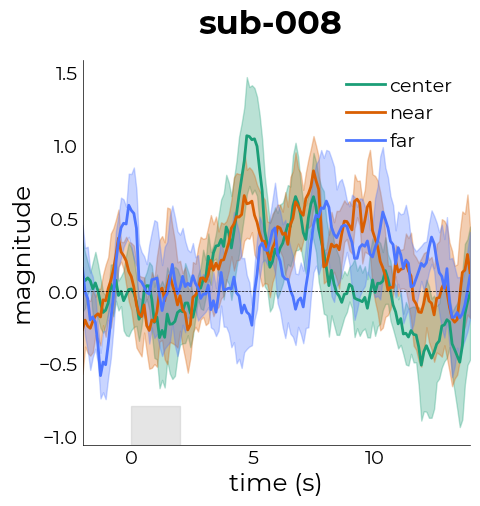

In [8]:
obj_gm = hr.viz.PlotEpochProfiles(
    sub_df.groupby(["event_type","epoch","t"]).mean()["gm"],
    # axs=ax,
    ev_names=["center","near","far"],
    cm=subj_obj.get_colors(),
    y_label="magnitude",
    title=subj,
    bsl=20
)

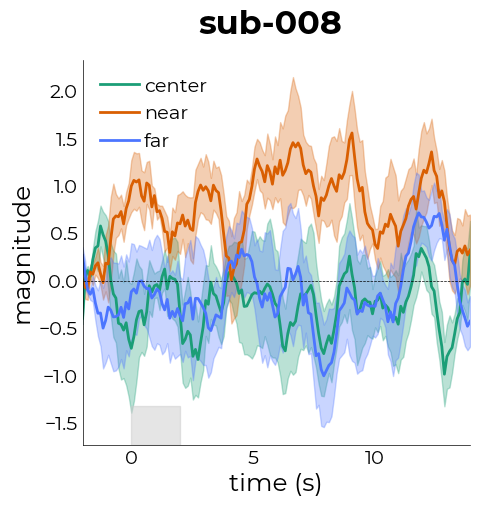

In [9]:
obj_wm = hr.viz.PlotEpochProfiles(
    sub_df.groupby(["event_type","epoch","t"]).mean()["wm"],
    # axs=ax,
    ev_names=["center","near","far"],
    cm=subj_obj.get_colors(),
    y_label="magnitude",
    title=subj,
    bsl=5
)

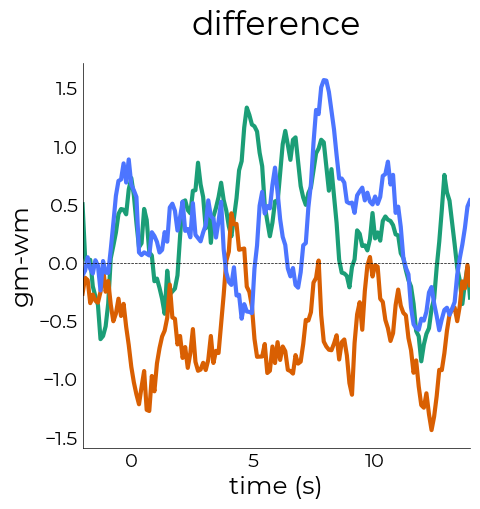

In [10]:
diff = [obj_gm.m_data[i]-obj_wm.m_data[i] for i in range(len(obj_gm.m_data))]
fig,axs = plt.subplots(figsize=(5,5))

plotting.LazyPlot(
    diff,
    xx=obj_gm.pl.xx,
    axs=axs,
    line_width=3,
    color=subj_obj.get_colors(),
    x_label="time (s)",
    y_label="gm-wm",
    title="difference",
    add_hline=0
)

## All subjects

In [5]:
h5_files

['/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-001/sub-001_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-002/sub-002_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-003/sub-003_ses-5_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-005/sub-005_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-006/sub-006_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-008/sub-008_ses-3_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-010/sub-010_ses-4_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-011/sub-011_ses-2_desc-0p_bold.h5',
 '/data1/projects/MicroFunc/Jurjen/projects/VE-NORDIC/derivatives/lsprep/sub-013/sub-013_ses-2_d

In [6]:
# parse h5-files
import pickle
data_dir = opj(os.path.dirname(hr.viz._save_figure(None, return_figdir=True)), "data")

pkl_base = "h5_parser_ve_nordic" # "h5_parser_lowpass" # "h5_parser"
# pkl_base = "h5_parser_lowpass"
h5_pkl = opj(data_dir, f"{pkl_base}.pkl")
overwrite = False

if not os.path.exists(h5_pkl) or overwrite:
    h5_obj = hr.data.H5Parser(
        h5_files,
        verbose=True,
        compartments=20,
        lp_kw={
        "window_length": 17
        },
        lp=True
    )

    print(f"Writing object to '{h5_pkl}'")
    with open(h5_pkl, 'wb') as handle:
        pickle.dump(h5_obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    print(f"Reading from '{h5_pkl}'")
    with open(h5_pkl, 'rb') as handle:
        h5_obj = pickle.load(handle)

Reading from '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/data/h5_parser_ve_nordic.pkl'


In [63]:
# plot filtered data
%matplotlib inline

for key,val in h5_obj.h5_objs.items():
    sesID = subj_obj.get_session(key)
    sub_df = utils.select_from_df(h5_obj.df_func, expression=f"subject = {key.split('-')[-1]}")
    rib_df = utils.select_from_df(sub_df, expression="ribbon", indices=subj_obj.get_ribbon(key))
    rib_filt = h5_obj.dict_ribbon[key]
    ffig,avg = h5_obj.plot_task_avg(
        orig=rib_df,
        filt=rib_filt,
        plot_title={
            "title": key,
            "fontweight": "bold"
        }
    )

    hr.viz._save_figure(
        ffig, 
        fname=f"{key}_ses-{sesID}_desc-filtered_ribbon", 
        subject=key,
        overwrite=True
    )

    plt.close()

Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-001/sub-001_ses-3_desc-filtered_ribbon.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-001/sub-001_ses-3_desc-filtered_ribbon.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-002/sub-002_ses-3_desc-filtered_ribbon.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-002/sub-002_ses-3_desc-filtered_ribbon.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-003/sub-003_ses-6_desc-filtered_ribbon.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-003/sub-003_ses-6_desc-filtered_ribbon.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-005/sub-005_ses-2_desc-filtered_ribbon.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/hole

In [7]:
# bijanzadeh = hr.viz.BijanzadehFigures()

In [8]:
# fname = opj(repo_dir, "images", "Fig3_bijanzadeh_orig_panel.pdf")
# fname2 = opj(repo_dir, "images", "Fig3c_bijanzadeh_2018.pdf")

# # original
# img1 = hr.utils.read_pdf_image(fname)
# img2 = hr.utils.read_pdf_image(fname2)

In [9]:

# fig,axs = plt.subplots(ncols=2, figsize=(20,10))
# axs[0].imshow(img1)
# plotting.conform_ax_to_obj(ax=axs[0], title={"title": "original", "fontweight": "bold"})

# # custom
# axs[1].imshow(img2)
# # plotting.conform_ax_to_obj(
# #     ax=axs[1],
# #     add_vline={
# #         "pos": 135,
# #         "color": "r",
# #         "lw": 2,
# #         "ls": "solid"
# #     },
# #     add_hline={
# #         "pos": [8,24,88,109,154,195,233],
# #         "color": "k",
# #         "lw": [2,1,1,1,1,1,2],
# #         "ls": ["solid","dashed","dashed","solid","solid","dashed","solid"]
# #     },
# #     title={
# #         "title": "custom", 
# #         "fontweight": "bold"
# #     },
# # )

# # axs[1].set_xticks(axs[1].get_xticks()+5)
# x_lbl_pos = [0,45, 90, 136, 181, 227, 275]
# axs[1].set_xticks(x_lbl_pos)
# axs[1].set_xticklabels(np.arange(-100,200*1.1, step=50, dtype=int))
# axs[1].set_yticklabels(["{:6.1f}".format(i) for i in np.arange(-0.2,1.4, step=0.2)])
# axs[1].set_yticklabels(["{:6.1f}".format(i) for i in np.arange(-0.2,1.4, step=0.2)])


# plt.show()

## Epochs

### Epoch subjects

In [10]:
sub_ep = fitting.Epoch(
    h5_obj.df_avg.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
sub_df = sub_ep.df_epoch.copy()
sub_df

gm        wm
subject task run event_type epoch t                             
001     SRFb 1   act        0     -2.000000   0.414458  1.983687
                                  -1.894737  -0.586094  2.079960
                                  -1.789474   0.916137  2.037189
                                  -1.684211   1.016491  1.848170
                                  -1.578947   1.060481  1.343482
...                                                ...       ...
014     SRFb 1   suppr_2    4      13.473684 -2.072639  0.021980
                                   13.578947 -1.901196  0.102728
                                   13.684211 -1.706991  0.048151
                                   13.789474 -0.894206 -0.149534
                                   13.894737 -0.348793 -0.087572

[43320 rows x 2 columns]

### Epoch X-compartment model (superficial, middle, deep)

In [36]:
comp_ep = fitting.Epoch(
    h5_obj.df_comps.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
comp_df = comp_ep.df_epoch.copy()
comp_df.head()

0         1         2  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000  2.990122  2.493911  3.072824   
                                  -1.894737  2.251295  2.573277  2.197632   
                                  -1.789474  5.172876  6.631680  4.929742   
                                  -1.684211  4.194949  4.762458  4.100364   
                                  -1.578947  5.499943  7.142130  5.226245   

                                                    3         4         5  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000  3.651736  3.815779  2.458641   
                                  -1.894737  1.821986  1.459883  1.147433   
                                  -1.789474  3.227805  1.861515  1.725937   
                                  -1.684211  3.438270  2.916156  2.907303   
                                  -1.578947  3.310360  1.924339  2.481151   

                                                    6         7         8  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000  1.101502  0.364650  0.744314   
                                  -1.894737  0.834983  0.357838 -0.415758   
                                  -1.789474  1.590360  1.505425  1.511649   
                                  -1.684211  2.898450  2.586773  1.730013   
                                  -1.578947  3.037963  2.832688  1.255656   

                                                    9        10        11  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000  1.123978  0.665765 -0.630327   
                                  -1.894737 -1.189354 -2.243090 -3.576967   
                                  -1.789474  1.517873  0.597437 -1.249658   
                                  -1.684211  0.873254 -0.331905 -1.885464   
                                  -1.578947 -0.321375 -1.711845 -2.915753   

                                                   12        13        14  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000 -1.926418 -2.163339 -1.811832   
                                  -1.894737 -4.910843 -4.374165 -2.798288   
                                  -1.789474 -3.096754 -3.448376 -2.969180   
                                  -1.684211 -3.439023 -3.688390 -3.213207   
                                  -1.578947 -4.119661 -4.734033 -5.020885   

                                                   15        16        17  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000 -1.460324 -1.396415 -1.410941   
                                  -1.894737 -1.222412 -0.920722 -0.966536   
                                  -1.789474 -2.489984 -1.486403 -0.339808   
                                  -1.684211 -2.738024 -1.174226  0.686468   
                                  -1.578947 -5.307736 -2.250324  1.719159   

                                                   18        19  
subject task run event_type epoch t                              
001     SRFb 1   act        0     -2.000000 -1.425467 -1.413016  
                                  -1.894737 -1.012350 -0.973081  
                                  -1.789474  0.806787 -0.176009  
                                  -1.684211  2.547162  0.952282  
                                  -1.578947  5.688643  2.286228

In [37]:
comp_avg_ev = comp_df.groupby(["event_type","epoch","t"]).mean()
comp_avg_ev.head()


0         1         2         3         4  \
event_type epoch t                                                             
act        0     -2.000000  0.530251  0.570593  0.523528  0.476462  0.358247   
                 -1.894737  0.230731  0.264080  0.225172  0.186265  0.099303   
                 -1.789474  0.442414  0.643396  0.408918  0.174439 -0.057199   
                 -1.684211  0.302628  0.348195  0.295033  0.241871  0.155016   
                 -1.578947  0.141654  0.202540  0.131507  0.060473 -0.012429   

                                   5         6         7         8         9  \
event_type epoch t                                                             
act        0     -2.000000 -0.020852 -0.399951 -0.459235  0.057148  0.573531   
                 -1.894737 -0.163858 -0.427018 -0.468771 -0.111991  0.244789   
                 -1.789474 -0.278427 -0.499655 -0.498317 -0.096361  0.305595   
                 -1.684211 -0.055379 -0.265774 -0.313178 -0.067198  0.178783   
                 -1.578947 -0.092181 -0.171932 -0.200084 -0.135354 -0.070625   

                                  10        11        12        13        14  \
event_type epoch t                                                             
act        0     -2.000000  0.618593  0.192333 -0.233926 -0.233254  0.004604   
                 -1.894737  0.237113 -0.135020 -0.507152 -0.372948  0.042553   
                 -1.789474  0.332947 -0.014304 -0.361554 -0.265450  0.076963   
                 -1.684211  0.141575 -0.178822 -0.499219 -0.358329  0.038832   
                 -1.578947 -0.151549 -0.378129 -0.604708 -0.418470 -0.002889   

                                  15        16        17        18        19  
event_type epoch t                                                            
act        0     -2.000000  0.242462  0.292955  0.292348  0.291741  0.292261  
                 -1.894737  0.458055  0.412331  0.240817  0.069303  0.216315  
                 -1.789474  0.419376  0.355120  0.179954  0.004788  0.154930  
                 -1.684211  0.435993  0.277676 -0.032136 -0.341947 -0.076395  
                 -1.578947  0.412692  0.284465  0.007927 -0.268611 -0.031578

### Epoch line

In [24]:
line_ep = fitting.Epoch(
    h5_obj.df_func.groupby(["subject","task","t"]).mean(),
    hr.data.average_tasks(h5_obj.df_onsets),
    TR=0.105,
    interval=[-2,14]
)
line_df = line_ep.df_epoch.copy()
line_df.head()

vox 0      vox 1      vox 2  \
subject task run event_type epoch t                                            
001     SRFb 1   act        0     -2.000000   4.577325  13.821548  -3.174515   
                                  -1.894737   8.041498   9.722703   1.804727   
                                  -1.789474  14.948609  10.789134   1.621823   
                                  -1.684211  19.774654  12.260509   8.316164   
                                  -1.578947  18.803690   8.962903  13.886045   

                                                vox 3     vox 4     vox 5  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000 -3.540993 -2.477357 -8.440166   
                                  -1.894737  0.033227 -3.493371 -6.778224   
                                  -1.789474 -4.119149 -1.081175 -4.199374   
                                  -1.684211 -0.798792  0.036701  0.914774   
                                  -1.578947 -1.712663  1.334097  2.032000   

                                                vox 6     vox 7      vox 8  \
subject task run event_type epoch t                                          
001     SRFb 1   act        0     -2.000000 -1.727460 -2.034787 -10.277599   
                                  -1.894737  0.538393 -0.126053 -10.081573   
                                  -1.789474  1.568698 -4.621284 -12.692630   
                                  -1.684211  4.069822 -3.045150 -11.325937   
                                  -1.578947  6.496494  1.735809 -11.603907   

                                                vox 9  ...    vox 710  \
subject task run event_type epoch t                    ...              
001     SRFb 1   act        0     -2.000000 -2.286207  ... -10.332638   
                                  -1.894737  2.509918  ... -11.582620   
                                  -1.789474  1.307518  ... -13.676375   
                                  -1.684211  1.929653  ... -15.929955   
                                  -1.578947 -2.602345  ... -13.184659   

                                              vox 711   vox 712   vox 713  \
subject task run event_type epoch t                                         
001     SRFb 1   act        0     -2.000000  1.955866 -3.113508  5.803124   
                                  -1.894737  2.703097 -5.206249  3.688739   
                                  -1.789474  8.662460 -6.839388  4.832408   
                                  -1.684211  6.293929 -6.647090  4.593415   
                                  -1.578947  5.969777 -3.009645  3.124470   

                                               vox 714   vox 715    vox 716  \
subject task run event_type epoch t                                           
001     SRFb 1   act        0     -2.000000  13.211136  6.804384   1.184194   
                                  -1.894737  16.717304  6.060456  -5.805538   
                                  -1.789474  16.580143  1.612494 -10.682069   
                                  -1.684211  14.073039  5.126337 -17.363146   
                                  -1.578947  13.022711  5.310081 -18.703621   

                                               vox 717    vox 718   vox 719  
subject task run event_type epoch t                                          
001     SRFb 1   act        0     -2.000000   2.843004  15.678621  2.474070  
                                  -1.894737   4.526238   8.199404 -2.367656  
                                  -1.789474   6.872161  12.004893 -3.638557  
                                  -1.684211  11.187103  17.977854 -2.703231  
                                  -1.578947   8.703295  17.858103  1.214371  

[5 rows x 720 columns]

### Plot epochs of events averaged over subjects

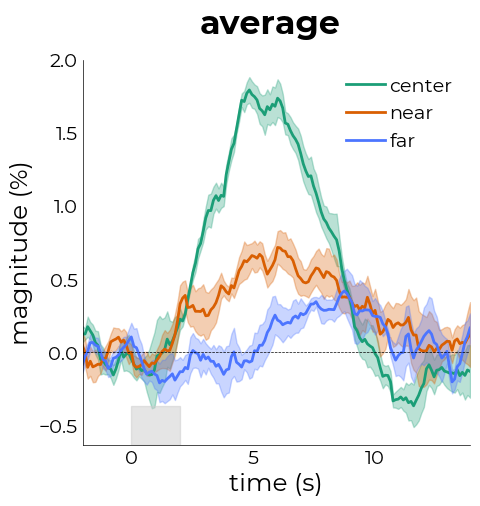

In [17]:
%matplotlib inline
avg_epoch = hr.viz.PlotEpochProfiles(
    sub_df.groupby(["event_type","epoch","t"]).mean()["gm"],
    title="average",
    ev_names=["center","near","far"],
    cm=subj_obj.get_colors(),
    y_label="magnitude (%)",
    bsl=20
)
 
# hr.viz._save_figure(avg_epoch.fig, fname="group_desc-epochs_average")

### Also check what happens if I shift baselines of within subjects before averaging across subjects

In [18]:
sub_avg_ep = sub_df.groupby(["subject","event_type","t"]).mean()
sub_avg_ep.head()

gm        wm
subject event_type t                            
001     act        -2.000000 -0.727703  1.281111
                   -1.894737 -0.552076  1.359053
                   -1.789474  0.051740  1.319203
                   -1.684211  0.108785  1.001315
                   -1.578947  0.372196  0.976646

In [19]:
n_subjs = utils.get_unique_ids(sub_avg_ep, id="subject")
evs = utils.get_unique_ids(sub_avg_ep, id="event_type")
df = []
for s in n_subjs:
    for e in evs:
        shift = fitting.Epoch.correct_baseline(
            utils.multiselect_from_df(
                sub_avg_ep, 
                expression=[
                    f"subject = {s}",
                    f"event_type = {e}"
                ]
            )
        )

        df.append(shift)

df_sub_shift = pd.concat(df)
df_sub_shift.columns = sub_avg_ep.columns
df_sub_shift

gm        wm
subject event_type t                             
001     act        -2.000000  -0.375108  1.633706
                   -1.894737  -0.199481  1.711648
                   -1.789474   0.404335  1.671798
                   -1.684211   0.461380  1.353910
                   -1.578947   0.724791  1.329241
...                                 ...       ...
014     suppr_2     13.473684  0.122799 -0.167289
                    13.578947  0.070480 -0.305104
                    13.684211  0.057716 -0.271112
                    13.789474  0.153002 -0.372846
                    13.894737  0.146198 -0.474338

[4560 rows x 2 columns]

In [20]:
# %matplotlib inline
# fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(8,4), constrained_layout=True)

# %matplotlib inline
# avg_epoch = hr.viz.PlotEpochProfiles(
#     sub_df.groupby(["event_type","epoch","t"]).mean(),
#     title="after averaging",
#     ev_names=["center","near","far"],
#     cm=subj_obj.get_colors(),
#     y_label="magnitude (%)",
#     axs=ax1,
#     force_title=True
# )
 
# # hr.viz._save_figure(avg_epoch.fig, fname="group_desc-epochs_average")

# avg_epoch = hr.viz.PlotEpochProfiles(
#     df_sub_shift,
#     title="before averaging",
#     ev_names=["center","near","far"],
#     cm=subj_obj.get_colors(),
#     y_label="magnitude (%)",
#     correct=False,
#     axs=ax2,
#     force_title=True
# )
 
# # hr.viz._save_figure(avg_epoch.fig, fname="group_desc-epochs_average")

### subject-specific epochs

Plotting 001
Plotting 002
Plotting 003
Plotting 005
Plotting 006
Plotting 008
Plotting 010
Plotting 011
Plotting 013
Plotting 014


Text(0.02, 0.5, 'magnitude (%)')

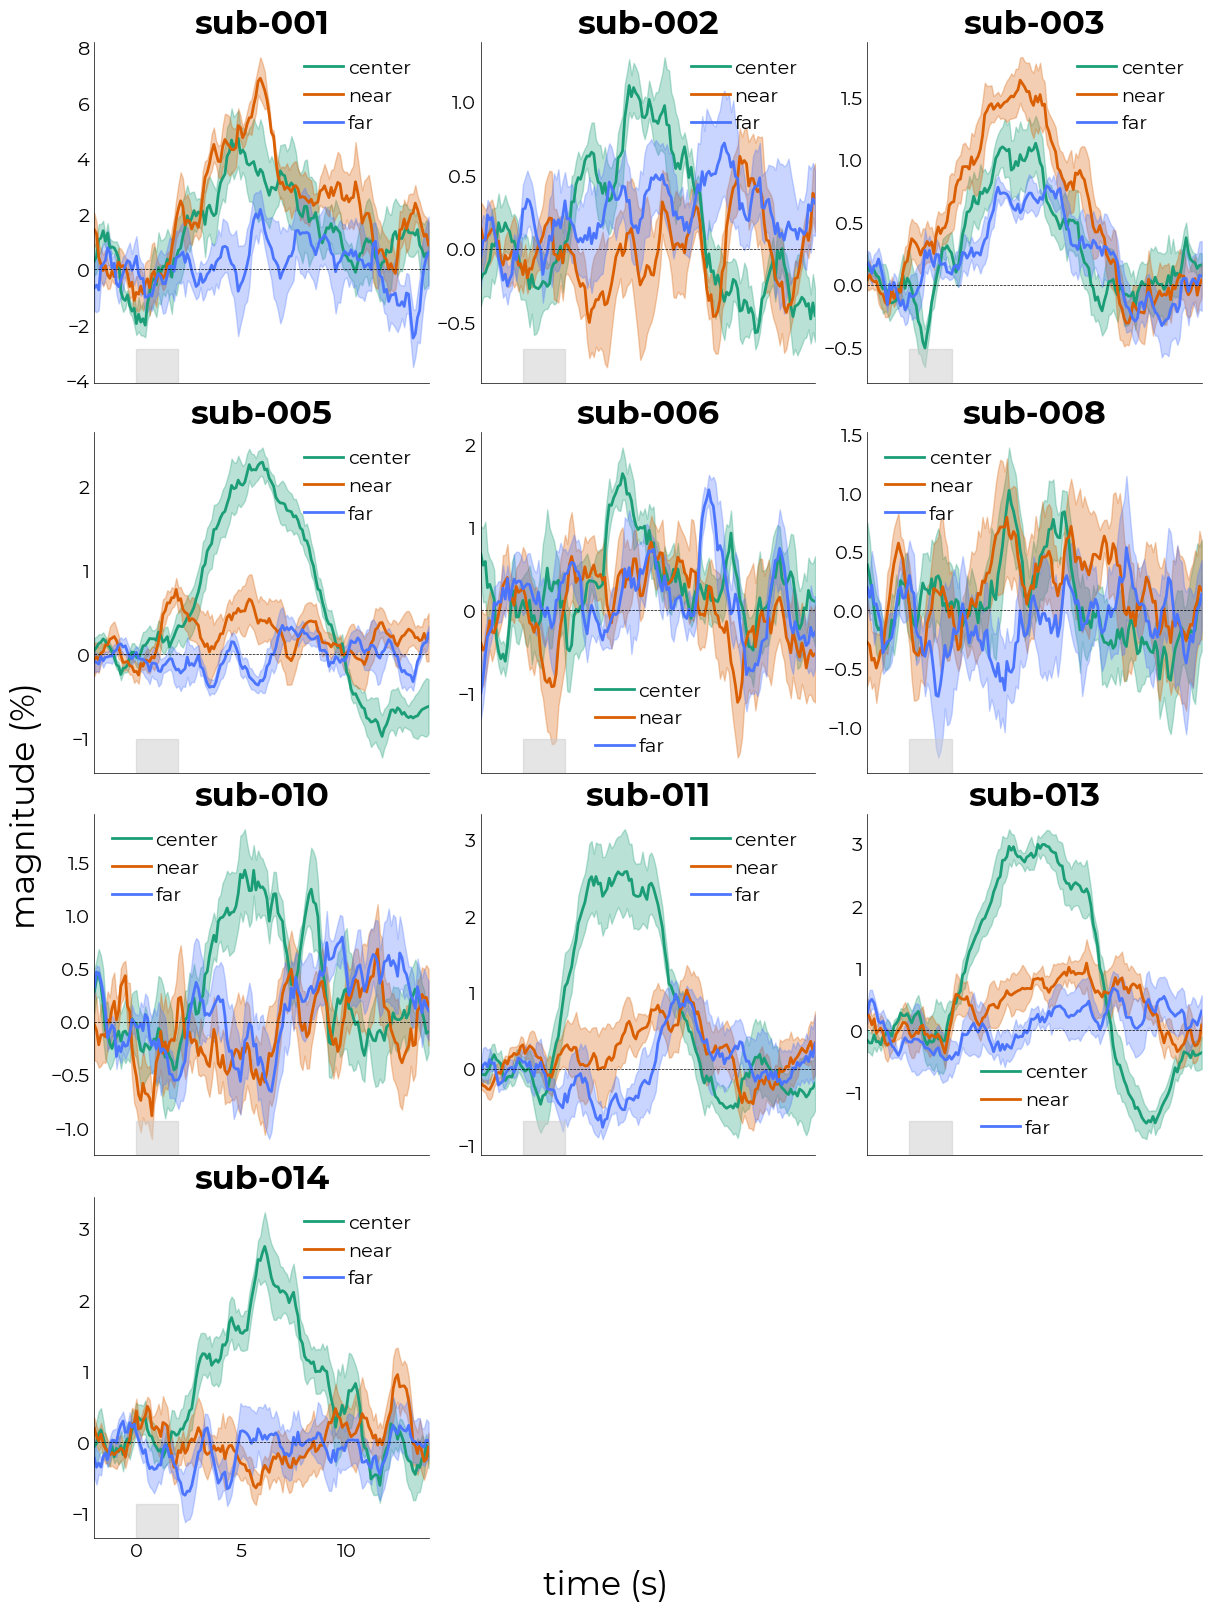

In [23]:
subj_ids = utils.get_unique_ids(sub_df, id="subject")
ncols = 3
nrows = int(np.ceil(len(subj_ids)/ncols))

fig,axs = plt.subplots(
    ncols=ncols, 
    nrows=nrows,
    figsize=(ncols*4,nrows*4), 
    constrained_layout=True,
    sharex=True
)

for ix,ax in enumerate(axs.flatten()):

    if (ix+1)>len(subj_ids):
        # remove obsolete axes
        ax.remove()
    else:
        sub = subj_ids[ix]
        print(f"Plotting {sub}")

        select_sub = utils.select_from_df(sub_df, expression=f"subject = {sub}")
        sub_gm = utils.select_from_df(select_sub, expression="ribbon", indices=[0])
        avg_epoch = hr.viz.PlotEpochProfiles(
            sub_gm.groupby(["subject","event_type", "epoch","t"]).mean(),
            axs=ax,
            ev_names=["center","near","far"],
            cm=subj_obj.get_colors(),
            # correct=False,
            bsl=20,
            x_label=None
        )

        ax.set_title(f"sub-{sub}", fontsize=24, fontweight="bold")

fig.supxlabel("time (s)", fontsize=24)
fig.supylabel("magnitude (%)", fontsize=24)
# hr.viz._save_figure(fig, fname="group_desc-epochs_subjects") #, overwrite=True)

In [ ]:
subj_ids = utils.get_unique_ids(sub_df, id="subject")
for sub in subj_ids:
    fig,axs = plt.subplots(figsize=(6,6))
    sesID = subj_obj.get_session(f"sub-{sub}")
    select_sub = utils.select_from_df(sub_df, expression=f"subject = {sub}")
    avg_epoch = hr.viz.PlotEpochProfiles(
        select_sub.groupby(["event_type","epoch","t"]).mean(),
        axs=axs,
        ev_names=["center","near","far"],
        cm=subj_obj.get_colors()
    )

    hr.viz._save_figure(fig, fname=f"sub-{sub}_ses-{sesID}_desc-epochs_ribbon_avg", subject=f"sub-{sub}")
    plt.close()

### Xin Yu plot averaged over subjects/epochs

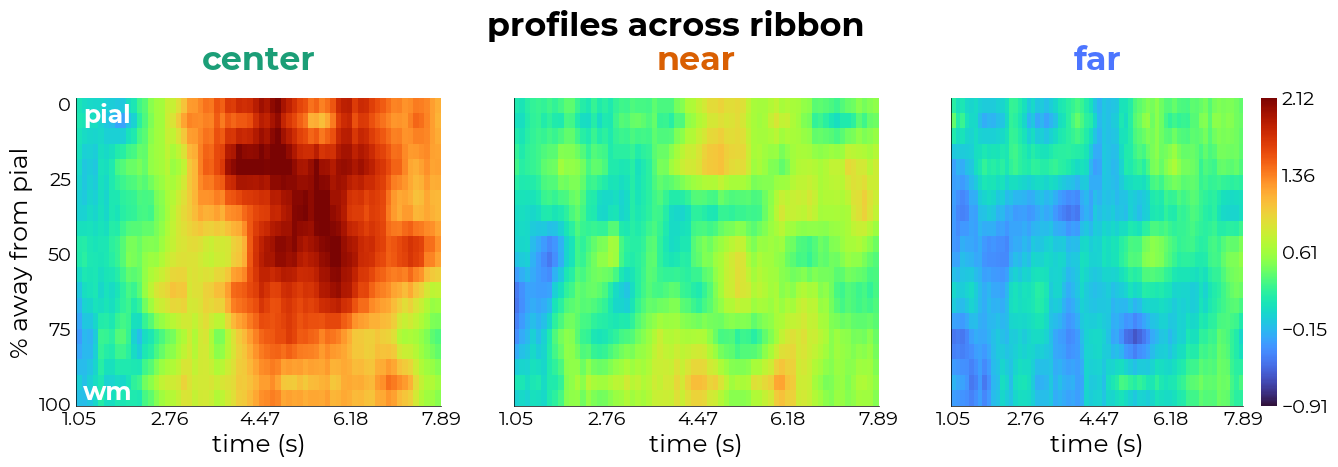

In [93]:
# comp_excl = utils.multiselect_from_df(
#     comp_df,
#     expression=[
#         "subject != 001",
#         "subject != 003",
#         # "subject != 008",
#     ]
# )
comp_excl = comp_df.copy()

xy_avg = hr.viz.XinYuPlot(
    comp_excl.groupby(["event_type","t"]).mean(),
    show_time=[1,8],
    ev_names=subj_obj.get_evs(),
    ev_colors=subj_obj.get_colors(),
    cm="turbo",
    time_ticks=5,
    depth_ticks=5,
    cb_kws={
        "cm_decimal": 2
    },
    contours=False,
    # cont_lines=np.arange(0,1,0.05),
    cont_kws={
        "cmap": "Greys"
    },
    # relative_to="center",
    bsl=20,
    title="profiles across ribbon",
    annot_ribbon=True
)

# hr.viz._save_figure(xy_avg.fig, fname="group_desc-group_epochs_depth")

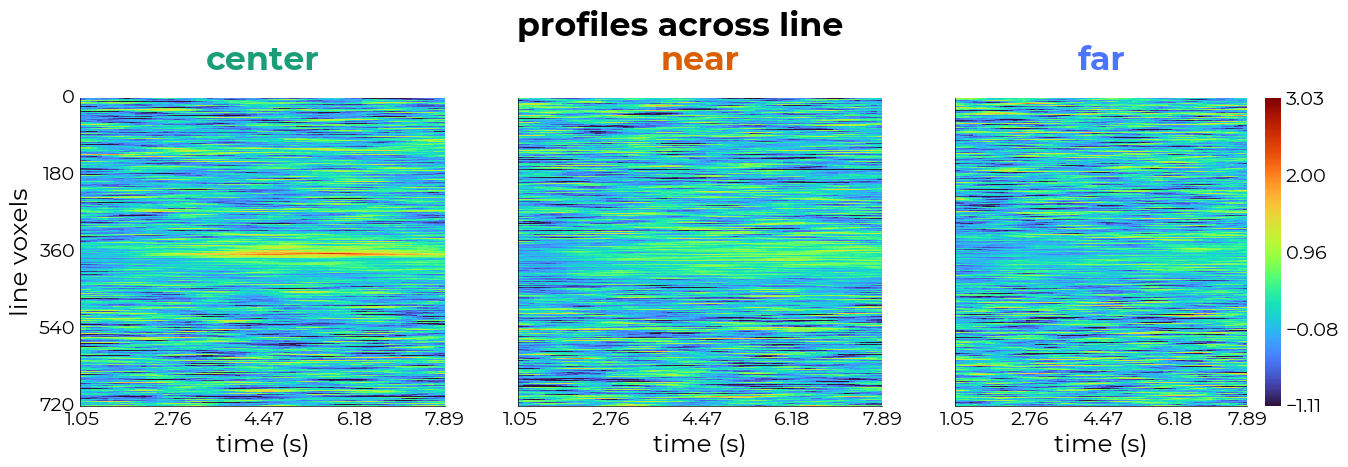

In [90]:
# comp_excl = utils.multiselect_from_df(
#     line_df,
#     expression=[
#         "subject != 001",
#         "subject != 003",
#         # "subject != 008",
#     ]
# )
comp_excl = line_df.copy()

xy_line = hr.viz.XinYuPlot(
    comp_excl.groupby(["event_type","t"]).mean(),
    show_time=[1,8],
    ev_names=subj_obj.get_evs(),
    ev_colors=subj_obj.get_colors(),
    cm="turbo",
    time_ticks=5,
    depth_ticks=5,
    as_depth=False,
    cb_kws={
        "cm_decimal": 2
    },
    contours=False,
    # cont_lines=np.arange(0,1,0.05),
    cont_kws={
        "cmap": "Greys"
    },
    # relative_to="center",
    # sns_kws={
    #     "vmin": -0.25,
    #     "vmax": 0.5
    # },
    y_lbl="line voxels",
    bsl=20,
    title="profiles across line"
)

# hr.viz._save_figure(xy_avg.fig, fname="group_desc-group_epochs_depth")

['005', '008', '010', '011', '013', '014']


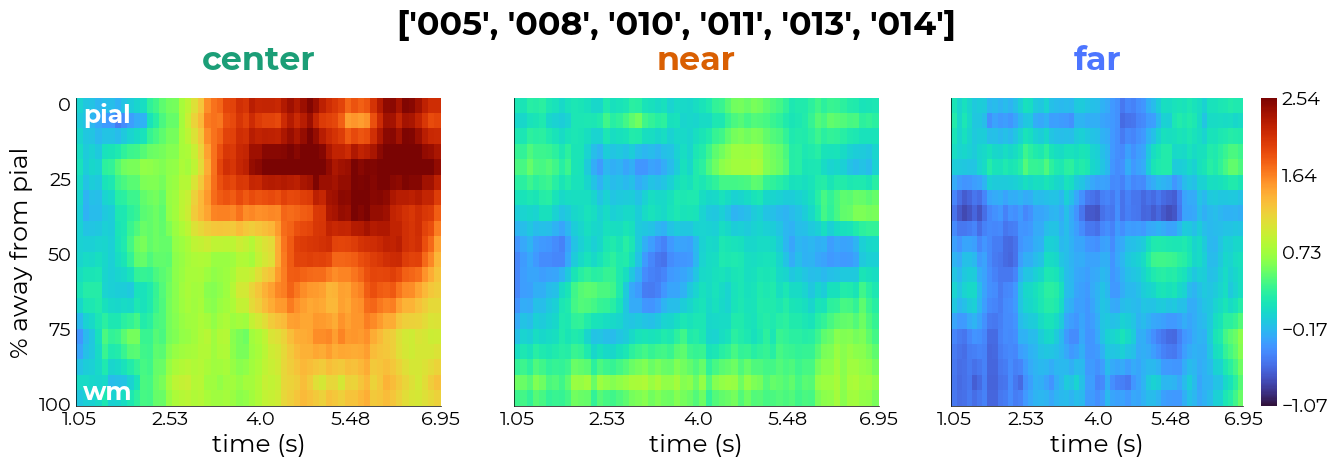

In [95]:
comp_excl = utils.multiselect_from_df(
    comp_df,
    expression=[f"subject != {i}" for i in ["001","002","003","006"]]
)

input_df = comp_excl.copy()
incl_list = utils.get_unique_ids(input_df, id="subject")
print(incl_list)
xy_avg = hr.viz.XinYuPlot(
    input_df.groupby(["event_type","t"]).mean(),
    show_time=[1,7],
    ev_names=subj_obj.get_evs(),
    ev_colors=subj_obj.get_colors(),
    cm="turbo",
    time_ticks=5,
    depth_ticks=5,
    cb_kws={
        "cm_decimal": 2
    },
    contours=False,
    # cont_lines=np.arange(0,1,0.05),
    # ds_time=False,
    cont_kws={
        "cmap": "Greys"
    },
    relative_to="center",
    # sns_kws={
    #     "vmin": -0.25,
    #     "vmax": 0.5
    # }
    title=str(incl_list),
    annot_ribbon=True,
    bsl=20
)

# hr.viz._save_figure(xy_avg.fig, fname="group_desc-group_epochs_depth")

Plotting sub-001
Plotting sub-002
Plotting sub-003
Plotting sub-005
Plotting sub-006
Plotting sub-008
Plotting sub-010
Plotting sub-011
Plotting sub-013
Plotting sub-014


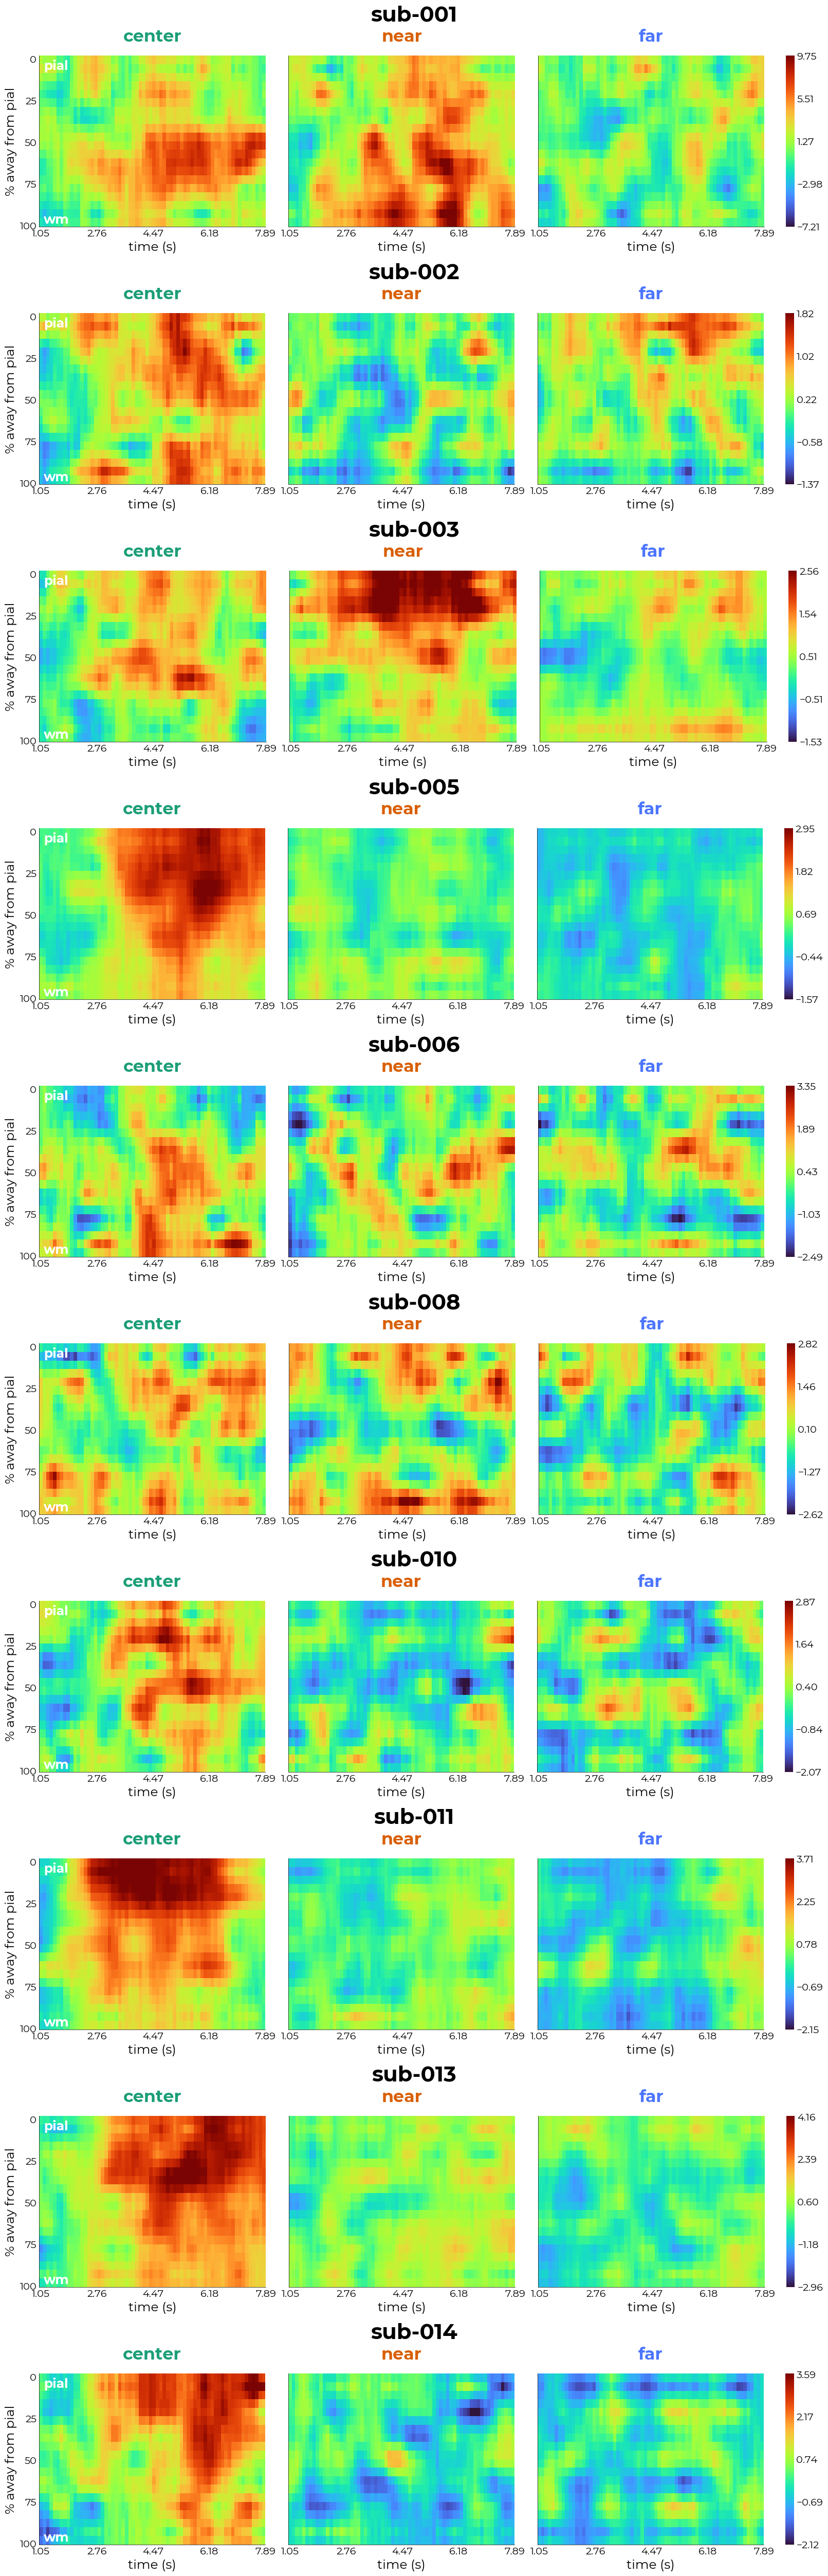

In [96]:
# subject epochs
subj_list = utils.get_unique_ids(comp_df, id="subject")
# subj_list = ["001"]
n_subjs = len(subj_list)
fig = plt.figure(figsize=(16,n_subjs*5), constrained_layout=True)
sf = fig.subfigures(nrows=n_subjs)

for ix,sub in enumerate(subj_list):

    print(f"Plotting sub-{sub}")
    if n_subjs>1:
        sf_ = sf[ix]
    else:
        sf_ = sf

    df = utils.select_from_df(comp_df, expression=f"subject = {sub}").groupby(["event_type","t"]).mean()
    xy_avg = hr.viz.XinYuPlot(
        df,
        axs=sf_,
        show_time=[1,8],
        ev_names=subj_obj.get_evs(),
        ev_colors=subj_obj.get_colors(),
        cm="turbo",
        time_ticks=5,
        depth_ticks=5,
        cb_kws={
            "cm_decimal": 2
        },
        contours=False,
        relative_to="center",
        bsl=20,
        annot_ribbon=True
    )    

    sf_.suptitle(f"sub-{sub}", fontweight="bold", fontsize=30)

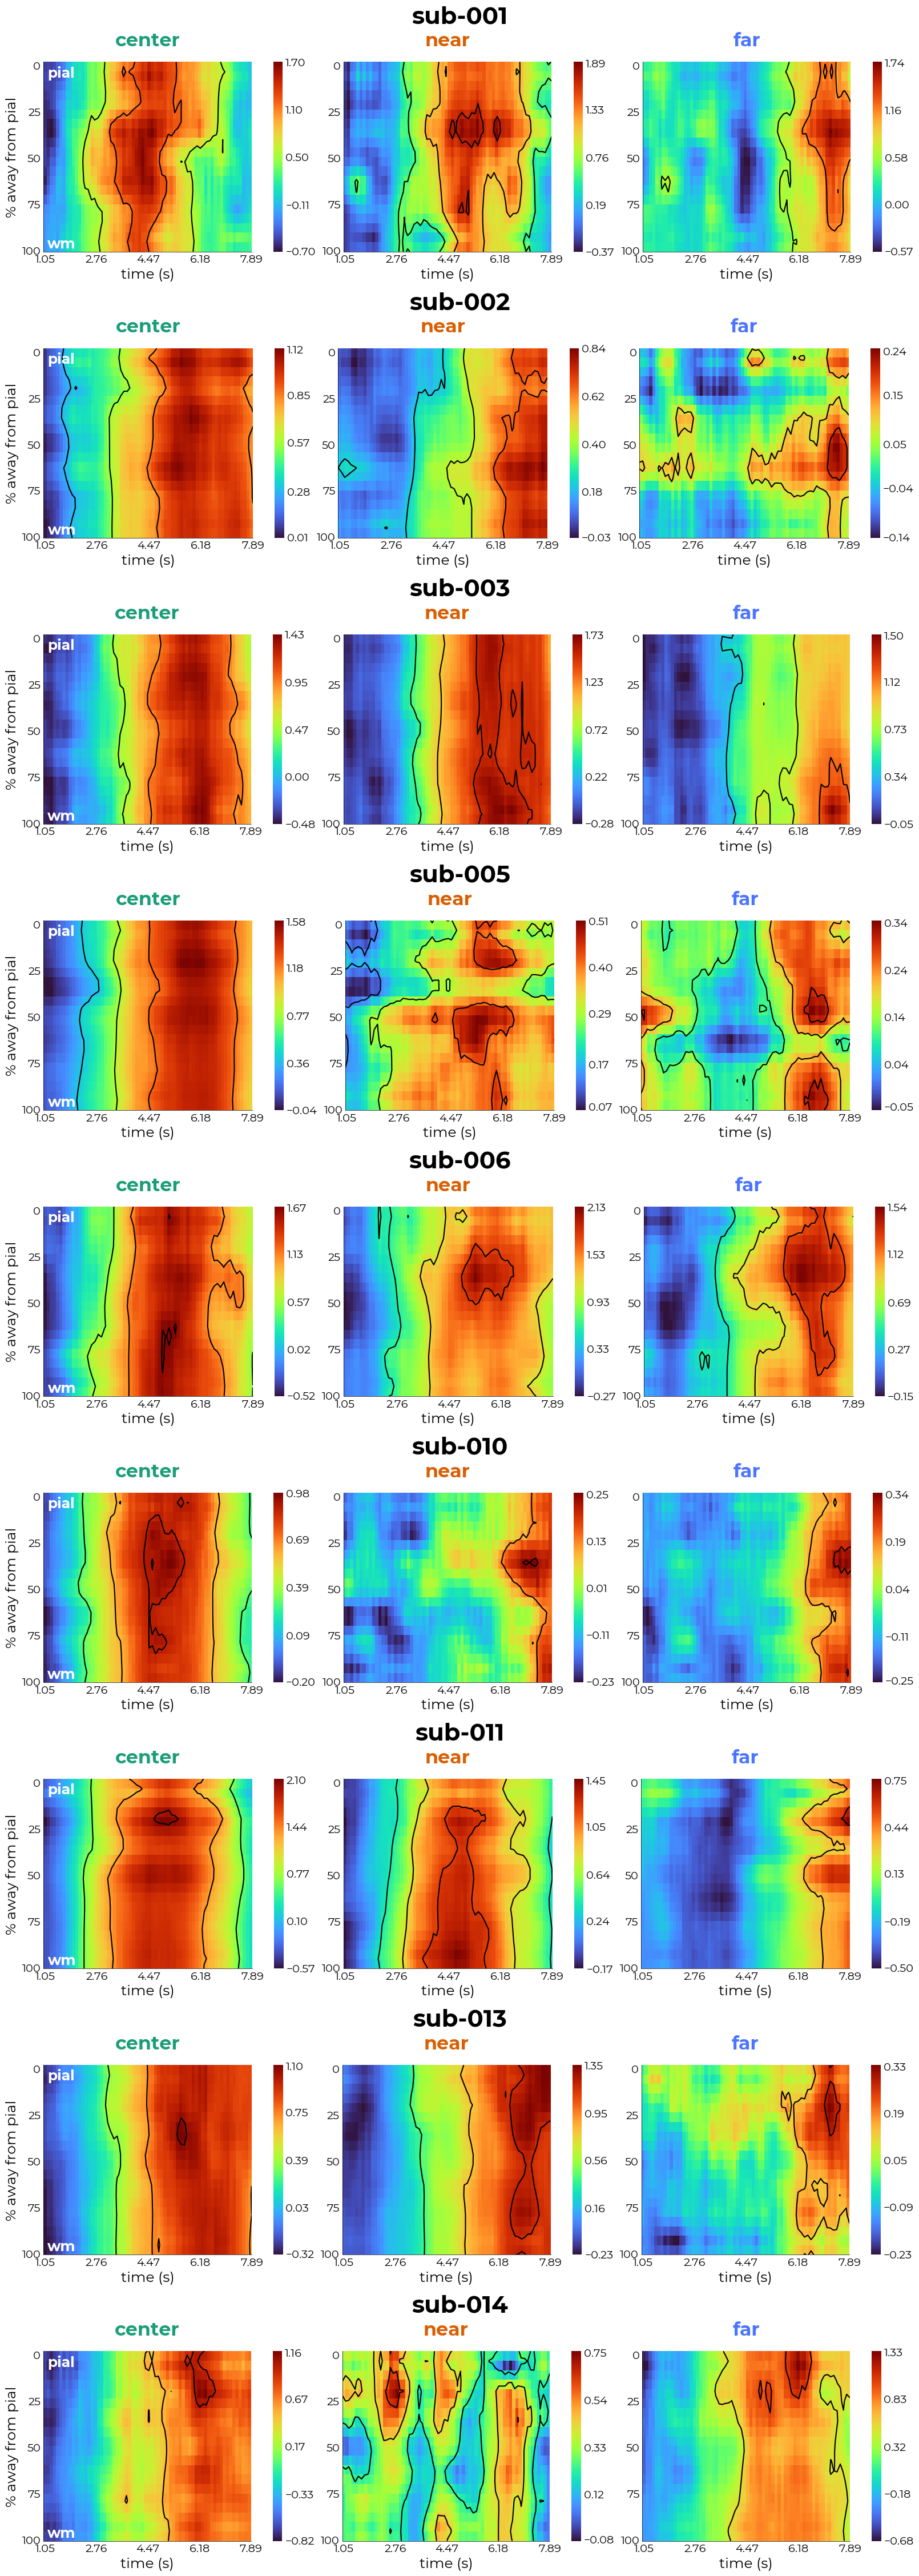

In [268]:
# subject epochs
# subj_list = utils.get_unique_ids(comp_excl, id="subject")
subj_list = subj_obj.get_subjects()
n_subjs = len(subj_list)
fig = plt.figure(figsize=(16,n_subjs*5), constrained_layout=True)
sf = fig.subfigures(nrows=n_subjs)

for ix,sub in enumerate(subj_list):

    sf_ = sf[ix]
    df = utils.select_from_df(comp_df, expression=f"subject = {sub.split('-')[-1]}")

    xy_avg = hr.viz.XinYuPlot(
        df.groupby(["event_type","epoch","t"]).mean(),
        axs=sf_,
        show_time=[1,8],
        ev_names=subj_obj.get_evs(),
        ev_colors=subj_obj.get_colors(),
        cm="turbo",
        time_ticks=5,
        depth_ticks=5,
        cb_kws={
            "cm_decimal": 2
        },
        contours=True,
        ds_time=True
    )    

    sf_.suptitle(sub, fontweight="bold", fontsize=30)

In [41]:
aic_df = []

order = [1,2]

for key,val in xy_avg.objs.items():

    ev_df = []
    for ord in order:

        aic = []
        for i in range(val["orig"].shape[1]):
            cf = fitting.CurveFitter(
                val["orig"].iloc[:,i].values,
                x=np.arange(0,val["orig"].shape[0]),
                order=ord,
                verbose=False
            )
            aic.append(cf.result.aic)

        ord_df = pd.DataFrame(aic, columns=["aic"])
        ord_df["order"] = ord
        ord_df["t"] = list(val["orig"].columns)

        ev_df.append(ord_df)

    ev_df = pd.concat(ev_df)
    ev_df["event_type"] = key
    aic_df.append(ev_df)
    
aic_df = pd.concat(aic_df)
aic_df.head()

aic  order     t event_type
0 -101.688941      1  1.05     center
1 -102.304970      1  1.16     center
2 -132.791569      1  1.26     center
3 -109.742329      1  1.37     center
4  -82.034048      1  1.47     center

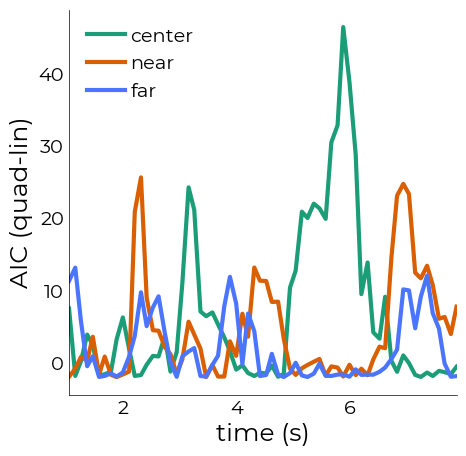

In [42]:
fig,axs = plt.subplots(figsize=(5,5))
data_list = []

for ix,(key,val) in enumerate(xy_avg.avg_imshow.items()):
    rel_df = utils.select_from_df(aic_df, expression=f"event_type = {key}")

    quad = abs(utils.select_from_df(rel_df, expression="order = 2")["aic"].values)
    lin = abs(utils.select_from_df(rel_df, expression="order = 1")["aic"].values)
    quad_better = quad-lin
    data_list.append(quad_better)

pl = plotting.LazyPlot(
    data_list,
    xx=utils.get_unique_ids(rel_df, id="t"),
    axs=axs,
    x_label="time (s)",
    y_label="AIC (quad-lin)",
    color=subj_obj.get_colors(),
    labels=list(xy_avg.avg_imshow.keys()),
    line_width=3
)

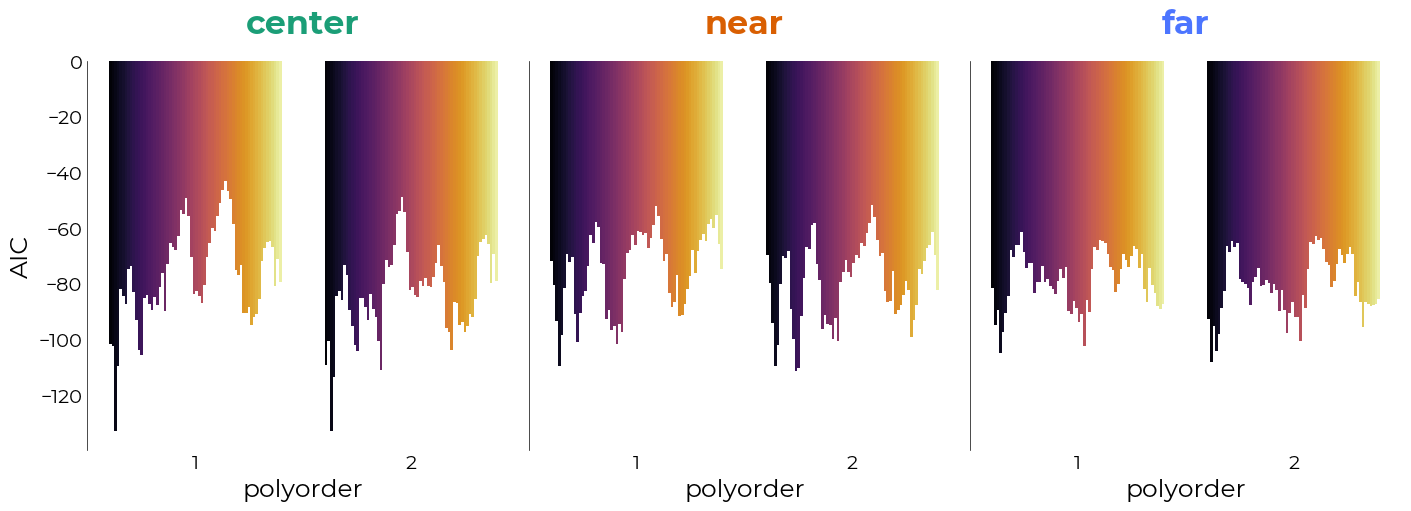

In [43]:
fig,axs = plt.subplots(ncols=len(xy_avg.avg_imshow), figsize=(14,5), sharey=True, constrained_layout=True)

for ix,(key,val) in enumerate(xy_avg.avg_imshow.items()):
    ev_df = utils.select_from_df(aic_df, expression=f"event_type = {key}")
    if ix == 0:
        y_lbl = "AIC"
    else:
        y_lbl = None

    plotting.LazyBar(
        ev_df,
        x="order",
        y="aic",
        hue="t",
        add_labels=True,
        x_label="polyorder",
        y_label=y_lbl,
        axs=axs[ix],
        title={
            "title": key,
            "fontweight": "bold",
            "color": subj_obj.get_colors()[ix]
        },
    )

profiles @:
- center 5s
- near 6s
- far 7s


# max val over depth > normalize? 
np.max(<some_data>, axis=1)

In [45]:
profiles_at_tpoint = [5,6,7]

evs = utils.get_unique_ids(comp_avg_ev, id="event_type")
resp = []
se = []
for ix,(ev,n_ev,t_) in enumerate(zip(evs,subj_obj.get_evs(),profiles_at_tpoint)):

    t_points = utils.get_unique_ids(comp_avg_ev, id="t")
    t_closest = utils.find_nearest(t_points, t_)[-1]

    ev_df = utils.multiselect_from_df(
        comp_avg_ev, 
        expression=[
            f"event_type = {ev}",
            f"t = {t_closest}"
        ]
    )

    grouper = ev_df.groupby(["event_type","t"])
    resp.append(grouper.mean().values.squeeze())
    se.append(grouper.sem().values.squeeze())

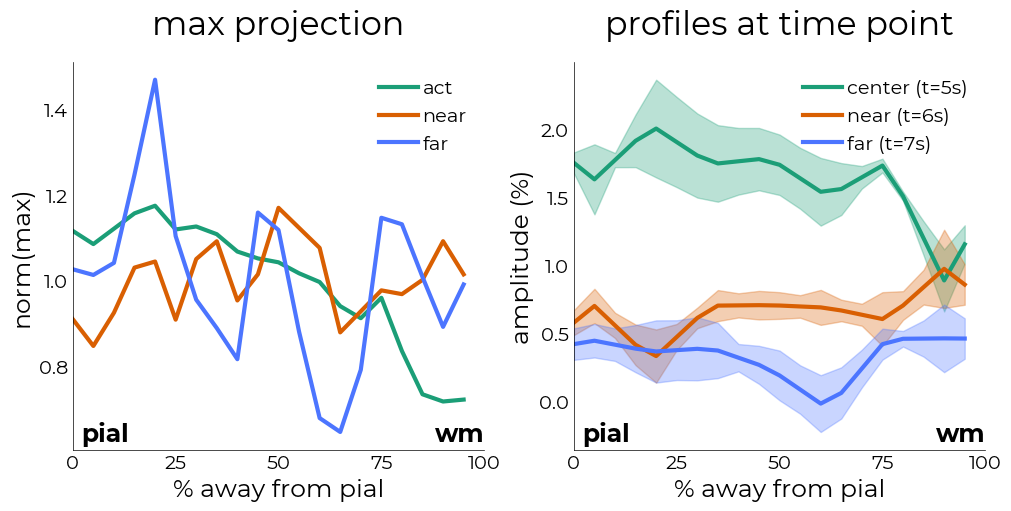

In [47]:
fig,(ax1,ax2) = plt.subplots(
    ncols=2, 
    figsize=(10,5), 
    constrained_layout=True
)

#------------------------------------------------------------------------------------------------------------------------------
# MAXIMUM PROJECTION
for ix,(key,val) in enumerate(xy_avg.avg_imshow.items()):
    max_vals = val.max(axis=1) #.values
    x_obj = hr.viz.make_wm_pial_ticks(max_vals)
    pl = plotting.LazyPlot(
        max_vals/max_vals.mean(),
        axs=ax1,
        line_width=3,
        color=subj_obj.get_colors()[ix],
        labels=[["act","near","far"][ix]],
        title="max projection",
        x_label="% away from pial",
        y_label="norm(max)",
        x_ticks=x_obj["ticks"],
        x_ticklabels=x_obj["labels"]
    )

hr.viz.annotate_cortical_ribbon(
    axs=ax1,
    pial_pos=(0.02,0.02),
    wm_pos=(0.88,0.02),
    fontsize=pl.font_size,
    fontweight="bold"
)

#------------------------------------------------------------------------------------------------------------------------------
# MAXIMUM AT TIMEPOINT
x_obj = hr.viz.make_wm_pial_ticks(resp[0])
obj = plotting.LazyPlot(
    resp,
    axs=ax2,
    labels=[f"{ev} (t={profiles_at_tpoint[ix]}s)" for ix,ev in enumerate(subj_obj.get_evs())],
    color=subj_obj.get_colors(),
    line_width=3,
    error=se,
    x_label="% away from pial",
    y_label="amplitude (%)",
    title="profiles at time point",
    x_ticks=x_obj["ticks"],
    x_ticklabels=x_obj["labels"]
)

hr.viz.annotate_cortical_ribbon(
    axs=ax2,
    fontsize=obj.font_size,
    fontweight="bold",
    pial_pos=(0.02,0.02),
    wm_pos=(0.88,0.02)
)

# hr.viz._save_figure(fig, fname="group_desc-maximum_projection")

In [ ]:
subj_obj.bijanzadeh_figures

{'center': '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/Fig3a_bijanzadeh_2018.pdf',
 'near': '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/Fig3c_bijanzadeh_2018.pdf',
 'far': '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/Fig3d_bijanzadeh_2018.pdf'}

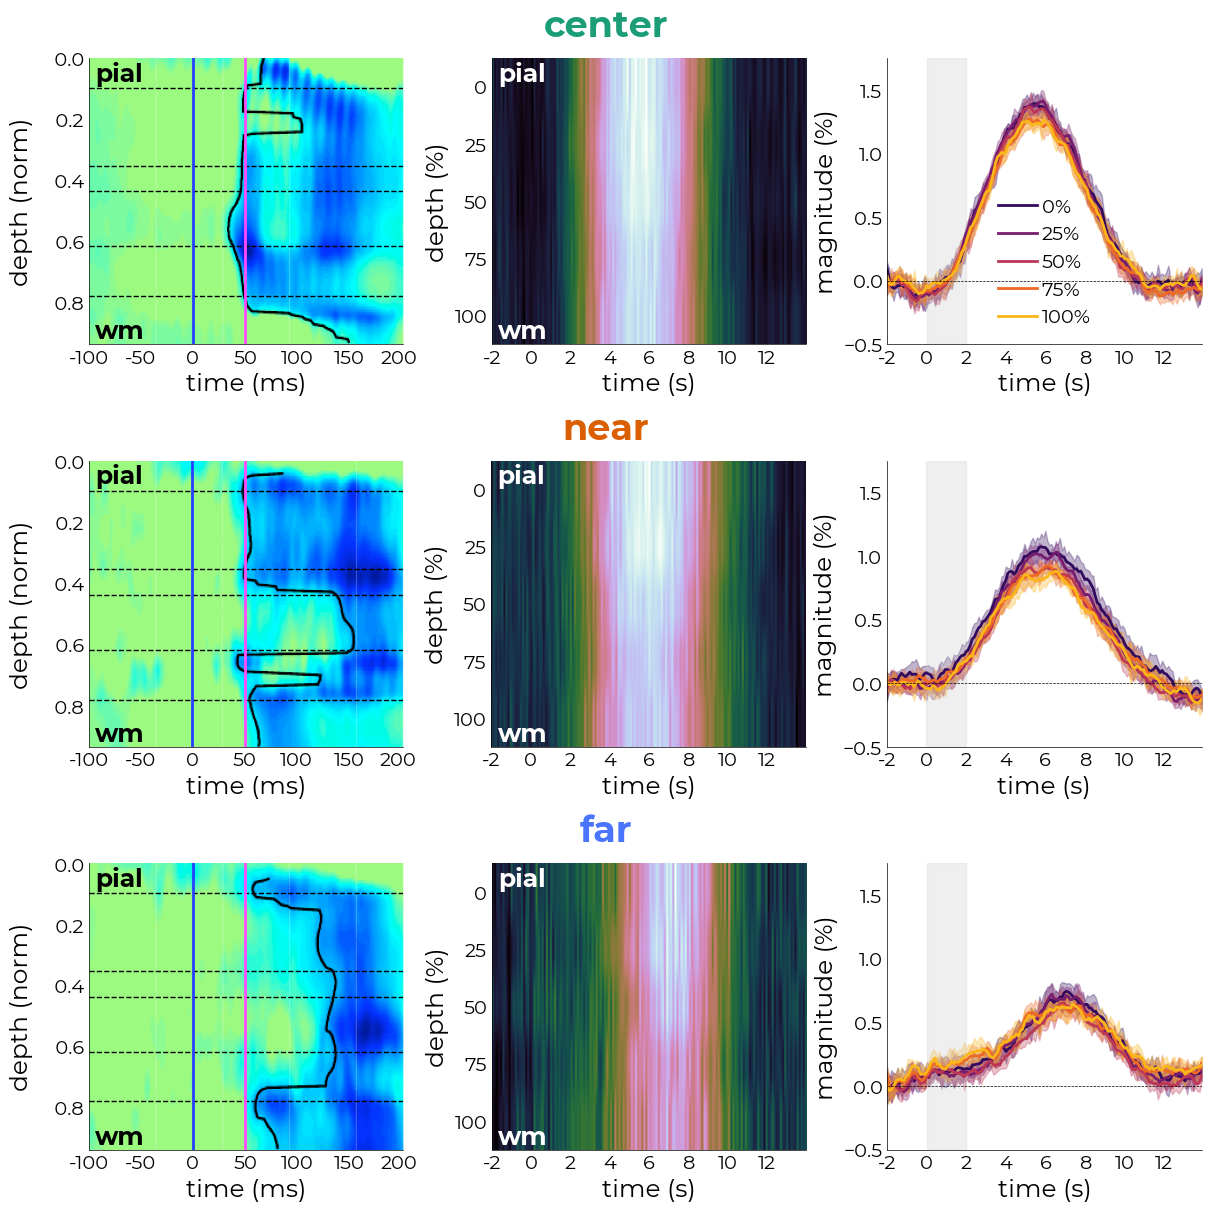

In [ ]:
evs = utils.get_unique_ids(comp_avg_ev, id="event_type")
fig = plt.figure(figsize=(12,12), constrained_layout=True)
sf = fig.subfigures(nrows=len(evs))

y_lim = [-0.5,1.75]
for ix,(ev,nn) in enumerate(zip(evs,["center","near","far"])):

    in_data = xy_avg.avg_imshow[nn]
    sem_data = list(utils.select_from_df(comp_avg_ev, expression=f"event_type = {ev}").groupby(["t"]).sem().values.T)
    axs = sf[ix].subplots(ncols=3)

    # plot Bijanzadeh fiures
    ax1 = axs[0]
    b_ = hr.viz.BijanzadehFigures.plot_single_bijanzadeh(
        subj_obj.bijanzadeh_figures[nn],
        axs=ax1,
        x_label="time (ms)",
        y_label="depth (norm)"
    )

    # fMRI 
    ax2 = axs[1]
    ax,xy = hr.viz.XinYuPlot.single_xinyu_plot(
        in_data,
        axs=ax2,
        force_int=True
    )
    
    # Profiles
    ax3 = axs[2]
    if ix == 0:
        add_lbl = [f"{int(i)}%" for i in np.linspace(0,100,in_data.shape[0])]
    else:
        add_lbl = None
        
    t_ = utils.get_unique_ids(comp_avg_ev, id="t")
    # corr_list = [
    #     preproc.lowpass_savgol(
    #         hr.utils.correct_baseline(
    #             i, 
    #             bsl=5
    #         ), 
    #         window_length=9, 
    #         polyorder=3
    #     ) for i in list(in_data)
    # ]
    
    pl = plotting.LazyPlot(
        corr_list,
        xx=t_,
        x_ticks=ax.get_xticklabels(),
        x_ticklabels=ax.get_xticklabels(),
        axs=ax3,
        cmap="inferno",
        labels=add_lbl,
        add_hline=0,
        x_label="time (s)",
        y_label="magnitude (%)",
        line_width=2,
        y_lim=y_lim,
        error=sem_data
    )

    hr.viz.add_axvspan(ax3)

    sf[ix].suptitle(
        nn, 
        color=subj_obj.get_colors()[ix],
        fontsize=pl.title_size*1.1, 
        fontweight="bold"
    )

# # save
# hr.viz._save_figure(fig, fname="group_desc-depth_imshow_profiles")

In [ ]:
# diff_cent_far = xy_avg.avg_imshow["center"]-xy_avg.avg_imshow["far"]
# fig,axs = plt.subplots(ncols=2, figsize=(9,4), constrained_layout=True)
# hr.viz.XinYuPlot.single_xinyu_plot(
#     diff_cent_far,
#     axs=axs[0],
#     force_int=True
# )

# t_ = utils.get_unique_ids(comp_avg_ev, id="t")[:400]
# pl = plotting.LazyPlot(
#     [preproc.lowpass_savgol(i, window_length=9, polyorder=3) for i in list(diff_cent_far)],
#     xx=t_,
#     axs=axs[1],
#     cmap="inferno",
#     labels=[f"{int(i)}%" for i in np.linspace(0,100,diff_cent_far.shape[0])],
#     add_hline=0,
#     x_label="time (s)",
#     y_label="magnitude (%)",
#     line_width=2
# )

# fig.suptitle("center-far", fontweight="bold", fontsize=pl.title_size*1.2)
# hr.viz._save_figure(fig, fname="group_desc-depth_imshow_center_min_far")

## Deconvolve

### Three compartment model

In [14]:
ff = hr.data.make_single_df(h5_obj.df_comps)
oo = hr.data.make_single_df(h5_obj.df_onsets, idx=["subject","run","event_type"])

comp_fit = fitting.NideconvFitter(
    ff,
    oo,
    basis_sets='canonical_hrf_with_time_derivative_dispersion',
    # basis_sets="fir",
    # n_regressors="tr",
    # basis_sets="fourier",
    # n_regressors=4,
    TR=0.105,
    interval=[-2,26],
    verbose=True,
    conf_intercept=True,
)

Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done


|████████████████████████████████████████| 5/5 [100%] in 0.4s (13.07/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (13.61/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.4s (12.87/s)         


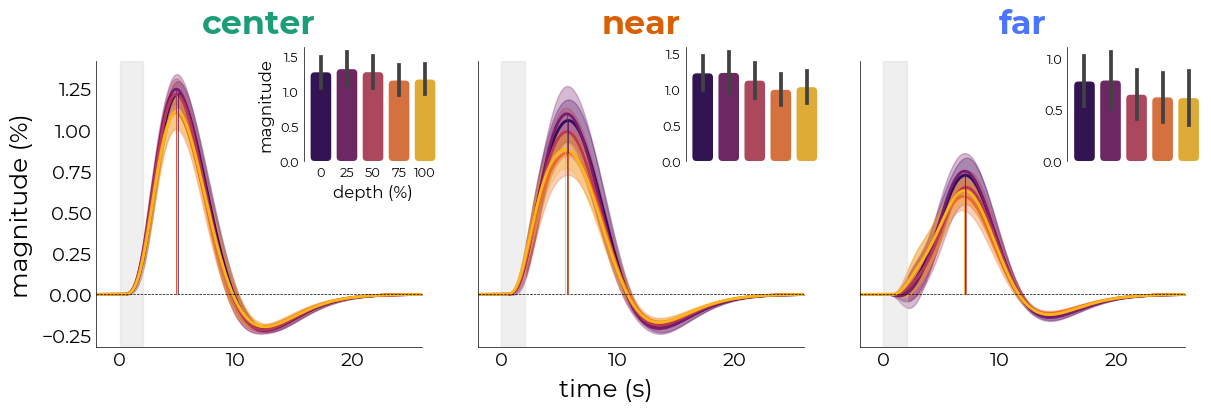

In [ ]:
dec_comp = hr.viz.PlotDeconvProfiles(
    comp_fit,
    inset_kwargs={
        "fancy": True,
        # "fancy_denom": 3,
        "sns_offset": 3,
        # "add_points": True,
        "sns_ori": "v"
    },
    ev_names=["center","near","far"],
    ev_colors=subj_obj.get_colors(),
    bold_title=True,
    err="sem",
    inset_par="magnitude",
    force_int=True
)

# hr.viz._save_figure(dec_comp.fig, fname="group_desc-depth_deconv")

In [ ]:
# create dataframe of stimulus sizes
stim_df = subj_obj.create_stim_df()
stim_df.head()

stim_size
subject event_type           
001     act              1.64
        suppr_1          3.57
        suppr_2          5.10
002     act              2.64
        suppr_1          4.47

In [ ]:
# add these to the parameter dataframe
merge_pars = h5_obj.merge_pars_stim_values(comp_fit.pars_subjects.groupby(["subject","event_type","vox"]).mean(), stim_df)
merge_pars

magnitude  magnitude_ix      fwhm  time_to_peak  \
subject event_type vox                                                    
001     act        0     1.313307      1286.000  4.463772      4.751500   
                   1     1.424270      1162.000  4.278029      4.100500   
                   2     1.323069      1123.000  4.287038      3.895750   
                   3     0.966695      1146.000  4.289779      4.016500   
                   4     0.970439      1268.000  4.372160      4.657000   
...                           ...           ...       ...           ...   
011     suppr_2    0     0.444827      1684.250  4.250665      6.842313   
                   1     0.434051      1689.500  4.213692      6.869875   
                   2     0.339338      1620.500  3.989318      6.507625   
                   3     0.384954      1626.875  3.970570      6.541094   
                   4     0.419736      1398.625  4.632599      5.342781   

                        half_rise_time  half_max  rise_slope  rise_slope_t  \
subject event_type vox                                                       
001     act        0          2.744746  0.656653    0.543092      2.735500   
                   1          2.276568  0.712135    0.676290      2.221000   
                   2          2.159245  0.661534    0.667968      2.105500   
                   3          2.224166  0.483347    0.470987      2.168500   
                   4          2.686541  0.485219    0.407208      2.677750   
...                                ...       ...         ...           ...   
011     suppr_2    0          4.951230  0.222414    0.217535      4.536250   
                   1          4.986696  0.217025    0.222563      4.655688   
                   2          4.721776  0.169669    0.129600      4.336094   
                   3          4.306160  0.192477    0.170953      3.941031   
                   4          3.724488  0.209868    0.228904      3.568938   

                        positive_area  undershoot  stim_size  
subject event_type vox                                        
001     act        0         5.890937    1.379070       1.64  
                   1         6.128609    1.408884       1.64  
                   2         5.749360    1.213300       1.64  
                   3         4.181513    0.927713       1.64  
                   4         4.263630    1.025235       1.64  
...                               ...         ...        ...  
011     suppr_2    0         2.146539    0.722276       9.92  
                   1         2.198069    0.764682       9.92  
                   2         1.876729    0.913841       9.92  
                   3         2.097532    0.621075       9.92  
                   4         2.091165    0.591799       9.92  

[90 rows x 11 columns]

In [ ]:
# correlate across depth
ev_ids = utils.get_unique_ids(merge_pars, id="event_type")
figsize = (len(ev_ids)*5,4)

fig,axs = plt.subplots(ncols=len(ev_ids), figsize=figsize)

for ix,ev in enumerate(ev_ids):
    ax = axs[ix]
    
    merge_avg = utils.select_from_df(merge_pars, expression=f"event_type = {ev}").groupby(["subject","event_type"]).mean()
    plotting.LazyCorr(
        data=merge_avg,
        x="magnitude",
        y="stim_size",
        color_by="subject",
        axs=ax,
        x_label="magnitude",
        y_label="stimulus size",
        correlation=True,
        result_to_plot=True,
        result_loc=[0.3,0.1],
        scatter_kwargs={
            "cbar": False
        },
        title={
            "title": ["center","near","far"][ix],
            "fontweight": "bold",
            "color": subj_obj.get_colors()[ix]
        },
    )

# hr.viz._save_figure(fig, fname="group_desc-correlation_stimulus_response")

NameError: name 'utils' is not defined

In [ ]:
merge_avg["sub_id"] = np.arange(0,len(utils.get_unique_ids(merge_avg, id="subject")))
merge_avg

magnitude  magnitude_ix      fwhm  time_to_peak  \
subject event_type                                                    
001     act          1.199556   1197.000000  4.338156      4.284250   
002     act          1.019032   1518.971429  5.641158      5.974600   
003     act          0.561527   1339.240000  4.515814      5.031010   
006     act          1.720849   1361.950000  4.200248      5.150238   
010     act          0.918181   1311.514286  4.876797      4.885450   
011     act          2.044693   1245.425000  4.339554      4.538481   

                    half_rise_time  half_max  rise_slope  rise_slope_t  \
subject event_type                                                       
001     act               2.418253  0.599778    0.553109      2.381650   
002     act               3.170959  0.509516    0.321973      2.893750   
003     act               3.122490  0.280763    0.284728      2.977420   
006     act               3.252990  0.860424    0.789464      3.176106   
010     act               2.732196  0.459091    0.376572      2.660200   
011     act               2.657926  1.022347    0.947516      2.610944   

                    positive_area  undershoot  stim_size  sub_id  
subject event_type                                                
001     act              5.242810    1.190840       1.64       0  
002     act              5.710232    1.142481       2.64       1  
003     act              2.442978    0.674942       1.89       2  
006     act              7.260258    2.024748       3.40       3  
010     act              4.413180    0.979406       1.76       4  
011     act              8.938517    2.290110       1.76       5

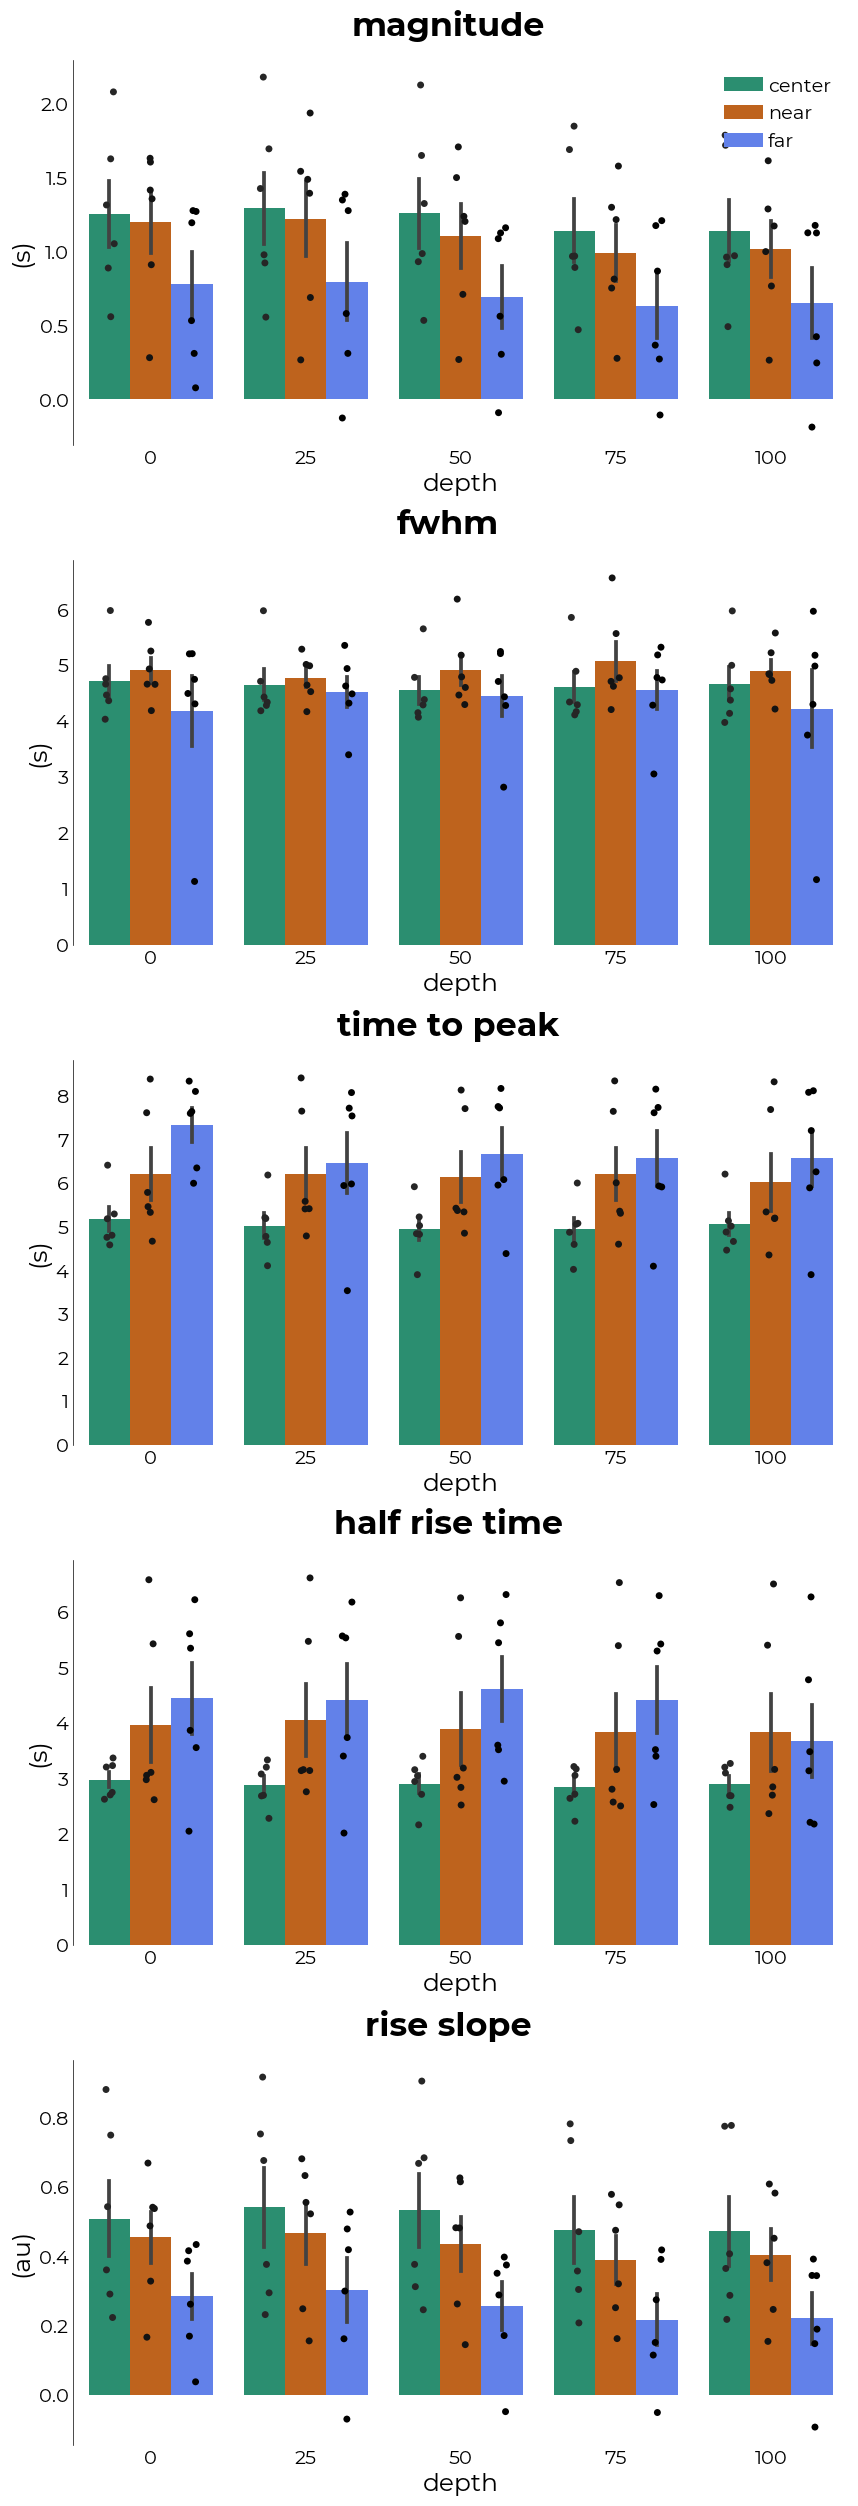

In [ ]:
incl_pars = {
    "magnitude": "s",
    "fwhm": "s",
    "time_to_peak": "s",
    "half_rise_time": "s",
    "rise_slope": "au"
}

fig = plt.figure(figsize=(10,len(incl_pars)*5))
sf = fig.subfigures(nrows=len(incl_pars))
for ix,(par,unit) in enumerate(incl_pars.items()):
    if ix == 0:
        add_lgnd = True
    else:
        add_lgnd = False

    axs = sf[ix].subplots()
    bar_plot = plotting.LazyBar(
        data=comp_fit.avg_pars_subjects,
        x="vox",
        y=par,
        add_labels=True,
        labels=[int(i) for i in np.linspace(0,100, len(utils.get_unique_ids(comp_fit.avg_pars_subjects, id="vox")))],
        axs=axs,
        x_label="depth",
        y_label=f"({unit})",
        # fancy=True,
        # sns_offset=3,
        add_points=True,
        points_color="k",
        hue="event_type",
        lbl_legend=["center","near","far"],
        bar_legend=add_lgnd,
        cmap=subj_obj.get_colors()
    ) 

    sf[ix].suptitle(par.replace("_"," "), fontsize=bar_plot.title_size, fontweight="bold")

hr.viz._save_figure(fig, fname="group_desc-parameters_ev")

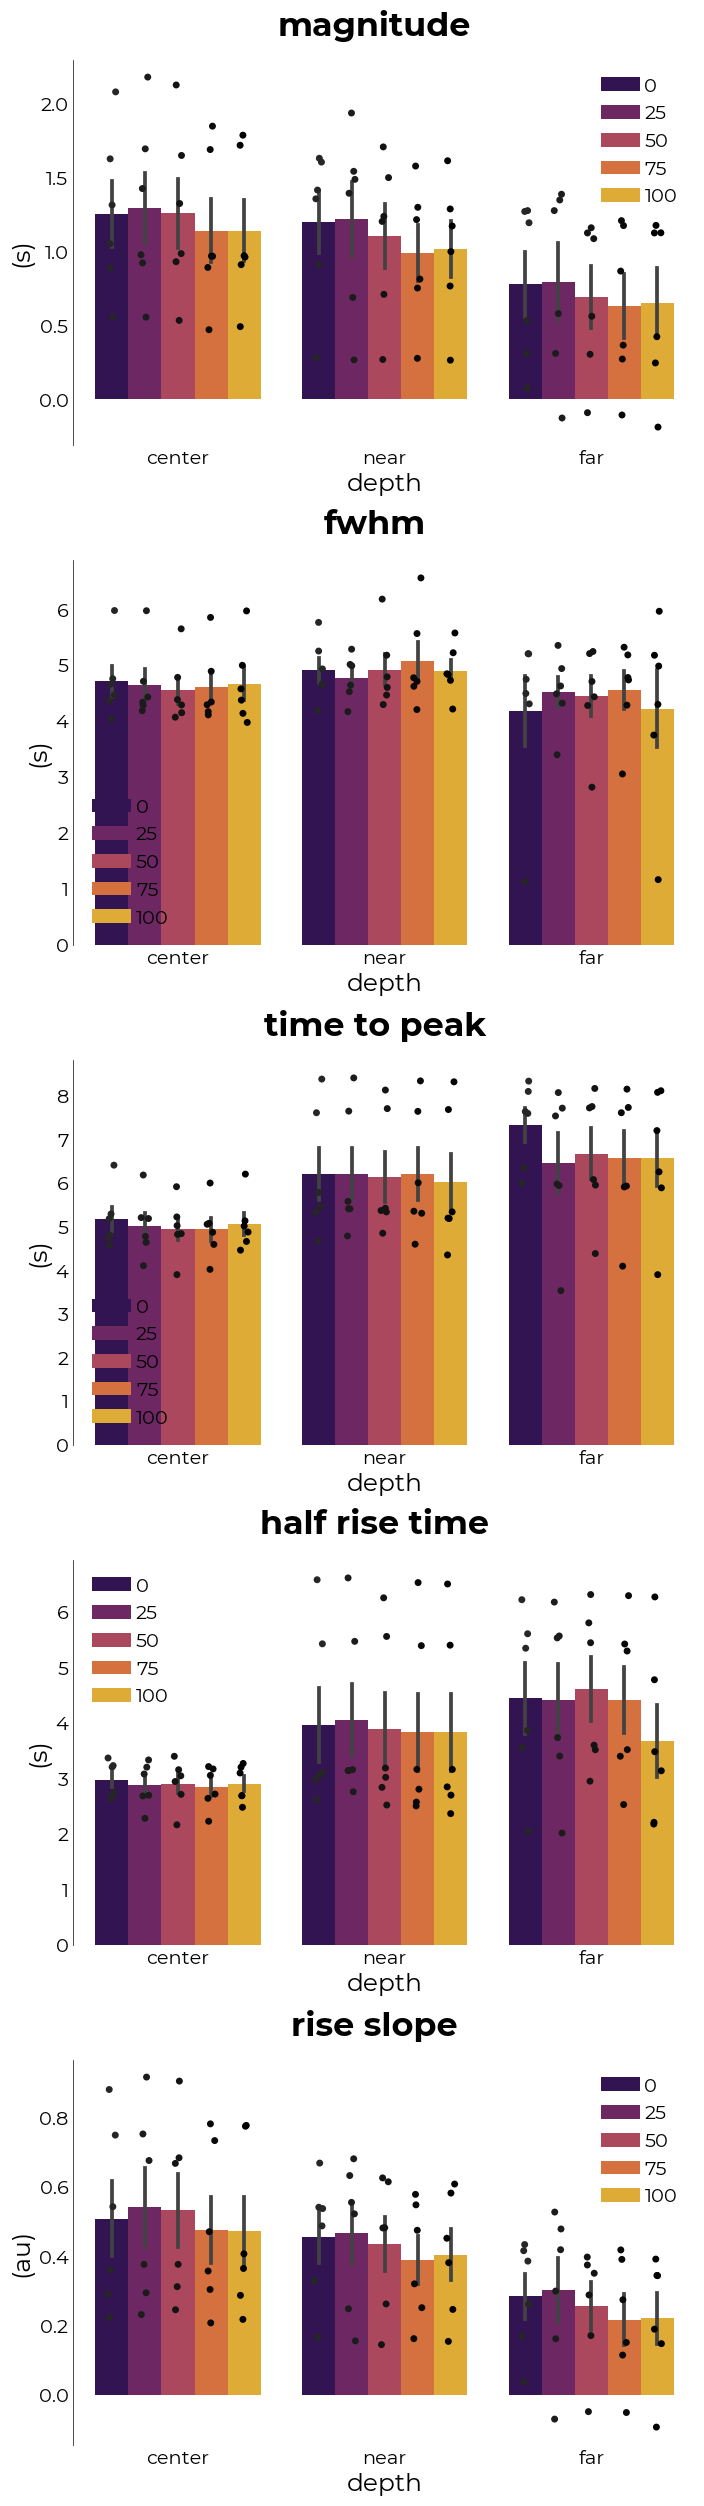

In [ ]:
incl_pars = {
    "magnitude": "s",
    "fwhm": "s",
    "time_to_peak": "s",
    "half_rise_time": "s",
    "rise_slope": "au"
}

fig = plt.figure(figsize=(8,len(incl_pars)*5))
sf = fig.subfigures(nrows=len(incl_pars))
for ix,(par,unit) in enumerate(incl_pars.items()):
    axs = sf[ix].subplots()
    bar_plot = plotting.LazyBar(
        data=comp_fit.avg_pars_subjects,
        x="event_type",
        y=par,
        add_labels=True,
        labels=["center","near","far"],
        axs=axs,
        x_label="depth",
        y_label=f"({unit})",
        # fancy=True,
        sns_offset=1,
        add_points=True,
        points_color="k",
        hue="vox",
        lbl_legend=[int(i) for i in np.linspace(0,100, len(utils.get_unique_ids(comp_fit.avg_pars_subjects, id="vox")))],
        bar_legend=True,
    ) 

    sf[ix].suptitle(par.replace("_"," "), fontsize=bar_plot.title_size, fontweight="bold")

hr.viz._save_figure(fig, fname="group_desc-parameters_depth")

In [ ]:
# fig,axs = plt.subplots(figsize=(10,6), constrained_layout=True)
# bar_plot = plotting.LazyBar(
#     data=comp_fit.avg_pars_subjects,
#     x="vox",
#     y="magnitude",
#     add_labels=True,
#     labels=[int(i) for i in np.linspace(0,100, len(utils.get_unique_ids(comp_fit.avg_pars_subjects, id="vox")))],
#     axs=axs,
#     x_label="depth",
#     y_label="(s)",
#     title={"title": "half rise time", "fontweight": "bold"},
#     # fancy=True,
#     # sns_offset=3,
#     hue="event_type",
#     lbl_legend=["center","near","far"],
#     bar_legend=True
# ) 

### Deconvolution vs Epoching

In [ ]:
comp_fit.tc_subjects.groupby(["subject","event_type"]).mean()

0         1         2         3         4
subject event_type                                                  
001     act         0.161542  0.168984  0.162408  0.116498  0.115947
        suppr_1     0.200608  0.209510  0.209833  0.149647  0.157155
        suppr_2     0.181393  0.193067  0.171560  0.133040  0.163471
002     act         0.176519  0.163779  0.156850  0.159401  0.161077
        suppr_1     0.124257  0.094895  0.097303  0.111253  0.119424
        suppr_2     0.012413 -0.010231  0.000085 -0.001642 -0.017291
003     act         0.072510  0.067762  0.057425  0.051581  0.054409
        suppr_1     0.195874  0.195232  0.165742  0.162181  0.159085
        suppr_2     0.185851  0.192537  0.169835  0.176117  0.163711
006     act         0.172470  0.190348  0.198126  0.188938  0.177916
        suppr_1     0.264408  0.288244  0.248860  0.247452  0.237366
        suppr_2     0.186553  0.190088  0.165987  0.175970  0.196773
010     act         0.118187  0.121344  0.124598  0.122477  0.128104
        suppr_1     0.023152  0.023920  0.023777  0.022413  0.021264
        suppr_2     0.025997  0.028860  0.024374  0.022389  0.015482
011     act         0.247442  0.256857  0.235084  0.218082  0.227738
        suppr_1     0.208269  0.192936  0.184363  0.167172  0.176282
        suppr_2     0.051397  0.052667  0.050403  0.059860  0.072879

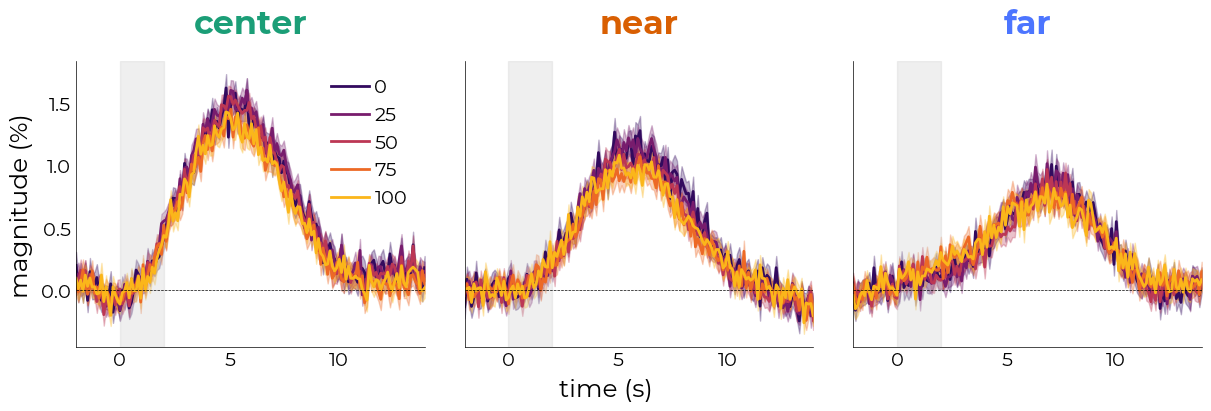

In [ ]:
ep_comp = hr.viz.PlotDeconvProfiles(
    comp_df,
    inset_kwargs={
        "fancy": True,
        # "fancy_denom": 3,
        "sns_offset": 3,
        # "add_points": True,
        "sns_ori": "v"
    },
    ev_names=["center","near","far"],
    ev_colors=subj_obj.get_colors(),
    bold_title=True,
    err="sem",
    time_par="t",
    force_int=True,
    bsl=20
)

hr.viz._save_figure(ep_comp.fig, fname="group_desc-depth_epoch")

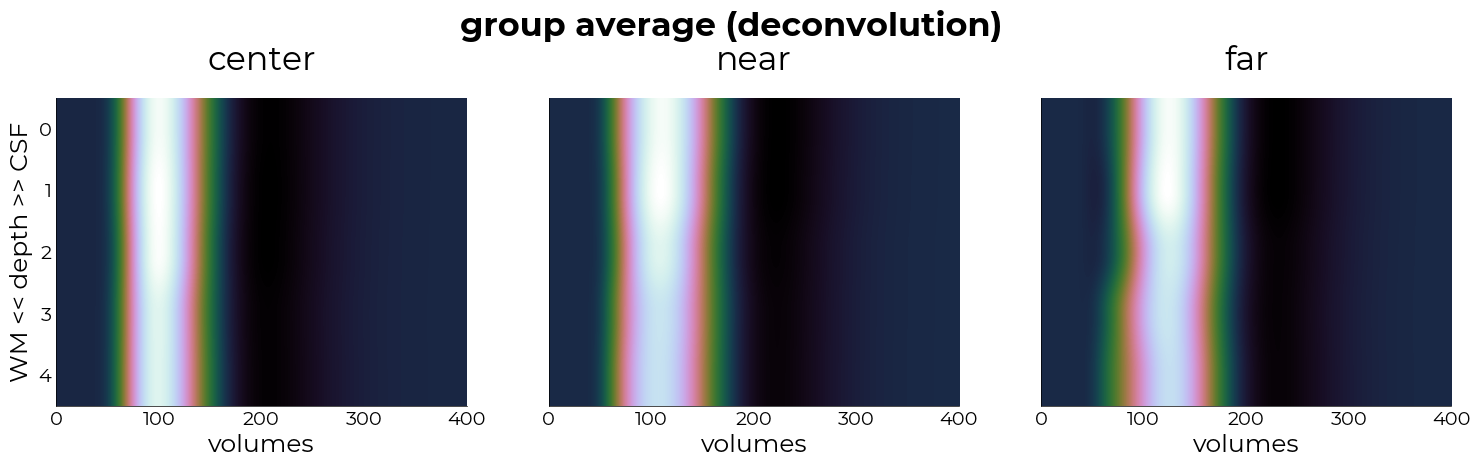

In [ ]:
xy_dec = hr.viz.XinYuPlot(
    comp_dec,
    vols=400,
    title="group average (deconvolution)",
    ev_names=["center","near","far"],
    time_key="time"
)

# hr.viz._save_figure(xy_avg.fig, fname="group_desc-group_epochs_depth")

### Single-subject ribbon profiles

In [32]:
models = {}

for key,val in h5_obj.dict_ribbon.items():

    # parse into single dataframe
    ff = hr.data.make_single_df(val.copy())
    oo = hr.data.make_single_df(utils.select_from_df(h5_obj.df_onsets, expression=f"subject = {key.split('-')[-1]}"), idx=["subject","run","event_type"])
    
    # fit
    can_fit = fitting.NideconvFitter(
        ff,
        oo,
        basis_sets='canonical_hrf_with_time_derivative_dispersion',
        # basis_sets="fourier",
        # n_regressors=4,
        TR=0.105,
        interval=[-2,26],
        verbose=True,
        conf_intercept=True
    )

    can_fit.timecourses_condition()

    models[key] = can_fit

Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'su

In [ ]:
models

{'sub-001': <linescanning.fitting.NideconvFitter at 0x7fe8fc874a60>,
 'sub-002': <linescanning.fitting.NideconvFitter at 0x7fe8869bbd90>,
 'sub-003': <linescanning.fitting.NideconvFitter at 0x7fe8ea876370>,
 'sub-005': <linescanning.fitting.NideconvFitter at 0x7fe8a01f8730>,
 'sub-006': <linescanning.fitting.NideconvFitter at 0x7fe8fd091e50>,
 'sub-010': <linescanning.fitting.NideconvFitter at 0x7fe8fd26f5e0>,
 'sub-011': <linescanning.fitting.NideconvFitter at 0x7fe8fc9da460>,
 'sub-013': <linescanning.fitting.NideconvFitter at 0x7fe8fc3dad90>,
 'sub-014': <linescanning.fitting.NideconvFitter at 0x7fe8fc2fa760>}

|████████████████████████████████████████| 9/9 [100%] in 0.6s (14.53/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.5s (16.33/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.6s (14.96/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.6s (15.20/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.6s (14.27/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.6s (14.39/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.5s (16.31/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.5s (15.93/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.5s (15.62/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.6s (14.12/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.6s (14.37/s)         
|████████████████████████████████████████| 9/9 [100%] in 0.5s (15.98/s)         
|███████████████████████████

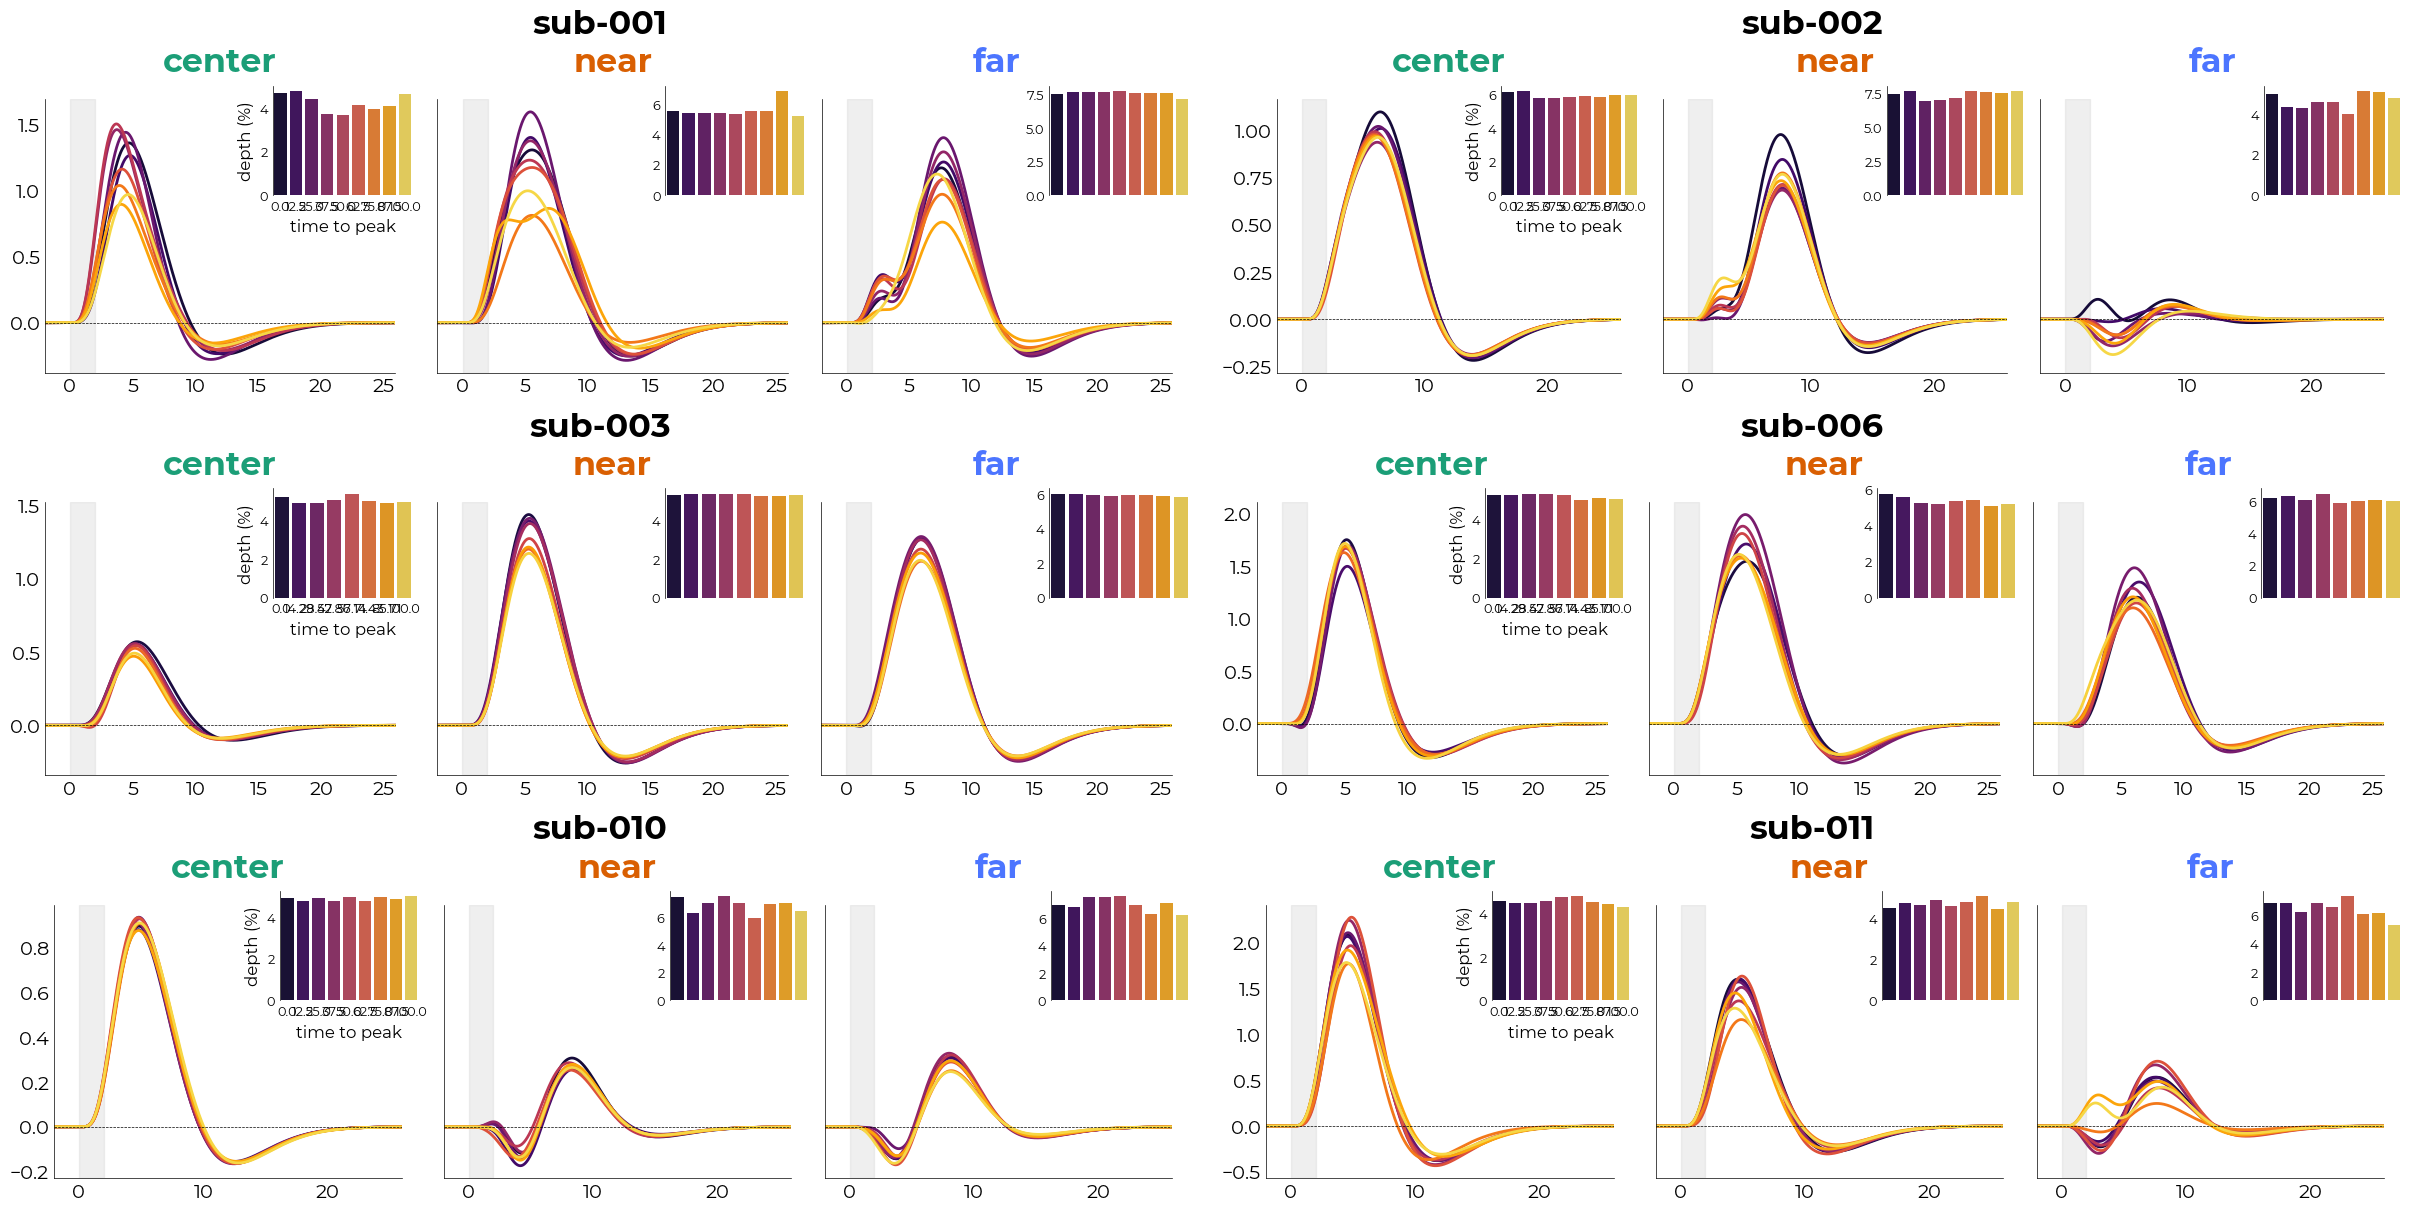

In [ ]:
ncols = 2
nrows = int(np.ceil(len(models)/ncols))
fig = plt.figure(figsize=(24,nrows*4), constrained_layout=True)

sf = fig.subfigures(ncols=ncols, nrows=nrows).flatten()
for ix,(sub,model) in enumerate(models.items()):
    axs = sf[ix].subplots(ncols=len(model.cond), sharey=True)
    dec_profs = hr.viz.PlotDeconvProfiles(
        model,
        axs=axs,
        ttp_lines=False,
        ev_names=["center","near","far"],
        ev_colors=subj_obj.get_colors(),
        bold_title=True,
    )

    sf[ix].suptitle(sub, fontsize=24, fontweight="bold")
hr.viz._save_figure(fig, fname="group_desc-depth_deconv_subjects")    

### Save timecourses + predictions

In [ ]:
# # fit
# can_fit = fitting.NideconvFitter(
#     ff,
#     oo,
#     basis_sets='canonical_hrf_with_time_derivative_dispersion',
#     # basis_sets="fourier",
#     # n_regressors=4,
#     TR=0.105,
#     interval=[-2,26],
#     verbose=True,
#     conf_intercep=True,
# )

In [33]:
import seaborn as sns

ev_names = ["center","near","far"]
for subID in subj_obj.get_subjects():
    print(f"Dealing with {subID}")
    sesID = subj_obj.get_session(subID)
    use_model = models[subID]
    runIDs = utils.get_unique_ids(use_model.func, id="run")

    fig,axs = plt.subplots(nrows=len(runIDs), figsize=(14,4*len(runIDs)), constrained_layout=True)
    for ix,run in enumerate(runIDs):
        d_ev = utils.select_from_df(use_model.func, expression=f"run = {run}").mean(axis=1).values

        tcs = [d_ev]
        labels = ["data"]
        for ev_ix,ev in enumerate(use_model.cond):

            p_ev = utils.select_from_df(use_model.ev_predictions, expression=(f"run = {run}","&",f"event_type = {ev}")).mean(axis=1).values
            tcs.append(p_ev)
            labels += [ev_names[ev_ix]]
        
        if len(runIDs)<2:
            ax = axs
        else:
            ax = axs[ix]

        pl = plotting.LazyPlot(
            tcs,
            line_width=[0.5,3,3,3],
            color=["#cccccc"]+subj_obj.get_colors(),
            x_label="volumes",
            y_label="magnitude",
            add_hline=0,
            axs=ax,
            labels=labels,
            # y_lim=[-2.5,2.5],
            title=f"run-{run}"
        )

    fig.suptitle(subID, fontweight="bold", fontsize=pl.title_size*1.3)
    hr.viz._save_figure(
        fig, 
        subject=subID, 
        fname=f"sub-{subID.split('-')[-1]}_ses-{sesID}_desc-timecourses_lowpass"
    )

    plt.close()

Dealing with sub-001
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-001/sub-001_ses-3_desc-timecourses_lowpass.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-001/sub-001_ses-3_desc-timecourses_lowpass.png'
Dealing with sub-002
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-002/sub-002_ses-3_desc-timecourses_lowpass.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-002/sub-002_ses-3_desc-timecourses_lowpass.png'
Dealing with sub-003
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-003/sub-003_ses-6_desc-timecourses_lowpass.pdf'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-003/sub-003_ses-6_desc-timecourses_lowpass.png'
Dealing with sub-005
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/sub-005/s

### Deconvolve the averages over tasks

In [ ]:
avg_task = utils.select_from_df(utils.multiselect_from_df(h5_obj.df_avg, expression=["subject = 011"]).groupby(["task","t"]).mean(), expression="task = SRFa")
avg_task

avg
task t                
SRFa 0.000   -1.304517
     0.105   -1.454216
     0.210   -1.910267
     0.315   -1.592387
     0.420   -1.808607
...                ...
     377.475 -0.878023
     377.580 -0.456040
     377.685 -0.218285
     377.790  0.146121
     377.895 -0.480830

[3600 rows x 1 columns]

In [ ]:
avg_tasks = h5_obj.df_comps.groupby(["subject","task","t"]).mean()
avg_tasks.head()

0         1         2         3         4
subject task t                                                      
001     SRFb 0.000 -0.070786 -0.004818  0.835636  1.140274 -1.369431
             0.105 -0.330341  0.139111  0.568504 -0.504185 -0.550797
             0.210 -1.539955 -1.806740 -1.990498  0.129398  0.227997
             0.315 -0.560143 -0.033390 -0.100903 -1.250237 -0.678383
             0.420  0.211964 -0.500866 -0.891430  0.659637 -0.501732

In [ ]:
sub_ids = utils.get_unique_ids(avg_tasks, id="subject")
onsets_task_avg = []
for sub in sub_ids:
    sub_df = utils.select_from_df(avg_tasks, expression=f"subject = {sub}")
    task_id = utils.get_unique_ids(sub_df, id="task")

    sub_tasks = []
    for task in task_id:
        task_onsets = utils.select_from_df(h5_obj.df_onsets, expression=(f"subject = {sub}","&",f"task = {task}"))
        runs_in_task = utils.get_unique_ids(task_onsets, id="run")[0]
        run_task = utils.select_from_df(task_onsets, expression=f"run = {runs_in_task}").reset_index()
        run_task.drop(["run"], inplace=True, axis=1)
        onsets_task_avg.append(run_task.set_index(["subject","task","event_type"]))

filt_onsets = pd.concat(onsets_task_avg)
filt_onsets.head()

onset
subject task event_type           
001     SRFb suppr_2     30.015976
             suppr_1     46.332903
             act         66.732840
             act         82.882682
             suppr_2     99.365912

In [ ]:
task_models = {}
for task in ["SRFa","SRFb"]:
    expr = f"task = {task}"

    ffunc = utils.select_from_df(avg_tasks, expression=expr)
    fonsets = utils.select_from_df(filt_onsets, expression=expr)

    inputs = {}
    for tag,df,idx in zip(['func','onsets'],[ffunc,fonsets],[["subject","t"],["subject","event_type"]]):
        df.reset_index(inplace=True)
        df.drop(["task"], inplace=True, axis=1)
        df.set_index(idx, inplace=True)
        inputs[tag] = df.copy()

    mmodel = fitting.NideconvFitter(
        inputs["func"],
        inputs["onsets"],
        basis_sets='canonical_hrf_with_time_derivative_dispersion',
        TR=0.105,
        interval=[-2,26],
        verbose=True,
        conf_intercept=True
    )
    mmodel.timecourses_condition()
    mmodel.parameters_for_tc_subjects()
    mmodel.pars_subjects["task"] = task
    task_models[task] = mmodel

Selected 'canonical_hrf_with_time_derivative_dispersion'-basis sets (with 3 regressors)
Adding event 'act' to model
Adding event 'suppr_1' to model
Adding event 'suppr_2' to model
Fitting with 'ols' minimization
Done
|████████████████████████████████████████| 5/5 [100%] in 0.4s (12.25/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (13.57/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (17.55/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (17.34/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.4s (12.99/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (17.01/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.4s (11.45/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.4s (13.09/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.4s (13.06/s)         
|████████████████████████████████████████| 5/5 [100%] 

In [ ]:
# # combine task-models
# comb_df = pd.concat([task_models["SRFa"].pars_subjects,task_models["SRFb"].pars_subjects])
# old_ix = list(comb_df.index.names)
# new_ix = old_ix.copy()
# new_ix.insert(1, "task")

# comb_df.reset_index(inplace=True)
# comb_df.set_index(new_ix, inplace=True)

# # average over tasks
# comb_df.concat_pars = comb_df.groupby(old_ix).mean()

|████████████████████████████████████████| 5/5 [100%] in 0.4s (12.51/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (19.08/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (13.13/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (17.56/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (17.52/s)         
|████████████████████████████████████████| 5/5 [100%] in 0.3s (13.23/s)         


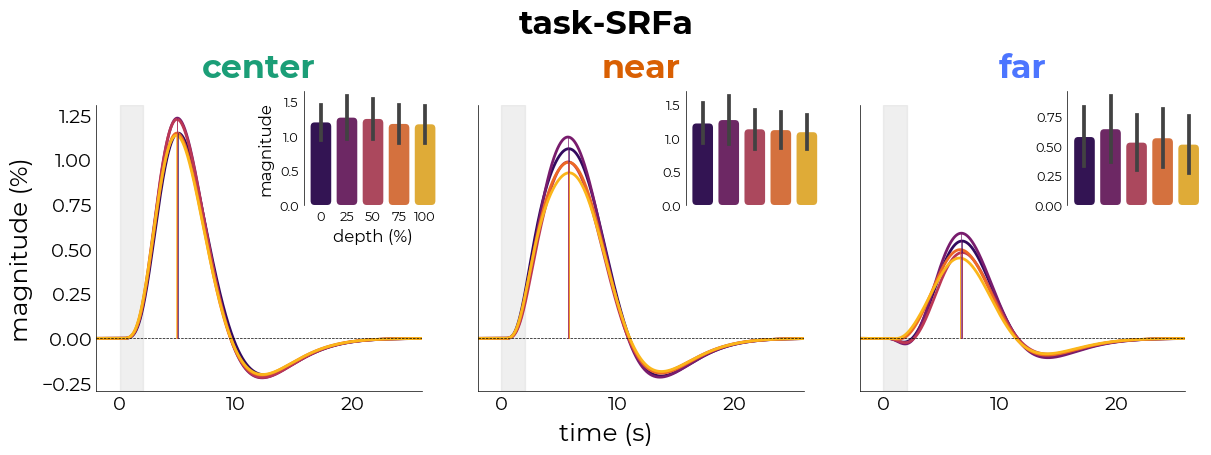

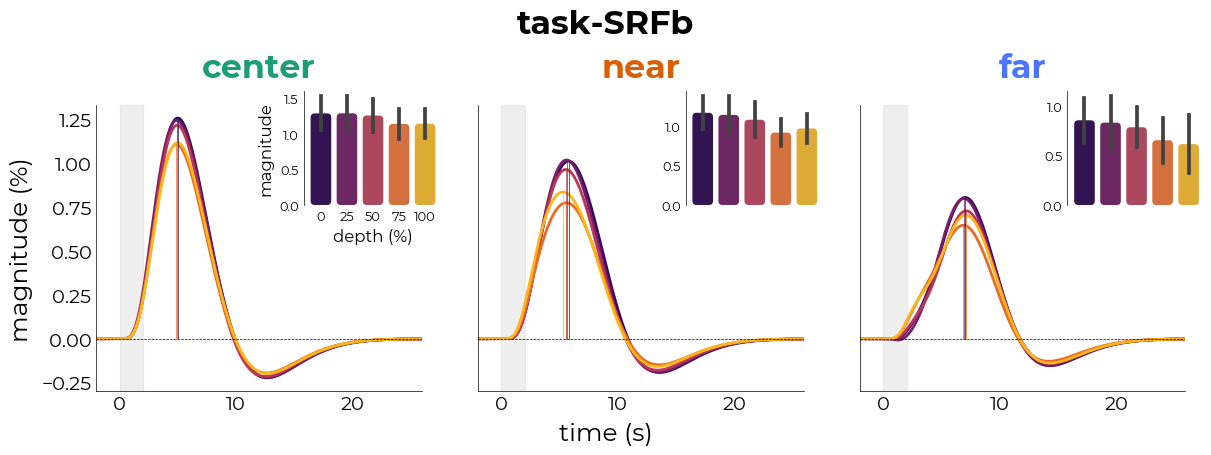

In [ ]:
for key,val in task_models.items():
    dec_comp = hr.viz.PlotDeconvProfiles(
        val,
        inset_kwargs={
            "fancy": True,
            # "fancy_denom": 3,
            "sns_offset": 3,
            # "add_points": True,
            "sns_ori": "v"
        },
        title=f"task-{key}",
        ev_names=["center","near","far"],
        ev_colors=subj_obj.get_colors(),
        bold_title=True,
        err="sem",
        inset_par="magnitude",
        force_int=True
    )

    # hr.viz._save_figure(dec_comp.fig, fname="group_desc-depth_deconv")

## GLMs

In [208]:
evs = utils.get_unique_ids(h5_obj.df_onsets, id="event_type")
add_intercept = True

# without intercept
c_vec1 = [1,1,0,0,0,0]
c_vec2 = [0,0,1,1,0,0]
c_vec3 = [0,0,0,0,1,1]

c_vecs = [
    c_vec1,
    c_vec2,
    c_vec3,
]

if add_intercept:
    c_vecs = [[0]+i for i in c_vecs]

c_vec = np.array(c_vecs)
c_vec.shape

(3, 7)

In [209]:
df_stim = hr.data.average_tasks(h5_obj.df_onsets)
df_stim.head()

onset
subject task event_type           
001     SRFb suppr_2     30.015976
             suppr_1     46.332903
             act         66.732840
             act         82.882682
             suppr_2     99.365912

In [210]:
from linescanning import glm
add_icpt = True
sub_glms = {}
for sub in subj_obj.get_subjects():

    print(f"running GLM for {sub}")
    expr = f"subject = {sub.split('-')[-1]}"

    sub_glms[sub] = {}
    for tag,df in zip(
        ["raw","ica","lp"],
        [h5_obj.df_raw,h5_obj.df_orig,h5_obj.df_func]):

        print(f" ..{tag}")
        df = utils.select_from_df(df, expression=expr)
        if tag in ["raw","lp"]:
            df = h5_obj.exclude_runs(df, sub)
        
        df = df.groupby(["subject","task","t"]).mean()
        sub_onsets = utils.select_from_df(df_stim, expression=expr)

        taskID = utils.get_unique_ids(df, id="task")[0]
        fit_line = glm.GenericGLM(
            utils.select_from_df(sub_onsets, expression=f"task = {taskID}"),
            utils.select_from_df(df, expression=f"task = {taskID}"), 
            hrf_pars="glover",
            derivative=True,
            TR=0.105, 
            osf=100, 
            add_intercept=add_icpt
        )

        fit_line.create_design(add_intercept=add_icpt)
        fit_line.fit(
            copes=c_vec, 
            add_intercept=add_icpt
        )

        sub_glms[sub][tag] = fit_line #fit_line.results

running GLM for sub-001
 ..raw
 ..ica
 ..lp
running GLM for sub-002
 ..raw
 ..ica
 ..lp
running GLM for sub-003
 ..raw
 ..ica
 ..lp
running GLM for sub-005
 ..raw
 ..ica
 ..lp
running GLM for sub-006
 ..raw
 ..ica
 ..lp
running GLM for sub-010
 ..raw
 ..ica
 ..lp
running GLM for sub-011
 ..raw
 ..ica
 ..lp
running GLM for sub-013
 ..raw
 ..ica
 ..lp
running GLM for sub-014
 ..raw
 ..ica
 ..lp


In [211]:
for key,val in sub_glms["sub-001"].items():
    print(f"{key}: {val}")

raw: <linescanning.glm.GenericGLM object at 0x7f11130fefa0>
ica: <linescanning.glm.GenericGLM object at 0x7f114d6d7cd0>
lp: <linescanning.glm.GenericGLM object at 0x7f115dbe3a60>


Plotting sub-001
Plotting sub-002
Plotting sub-003
Plotting sub-005
Plotting sub-006
Plotting sub-010
Plotting sub-011
Plotting sub-013
Plotting sub-014


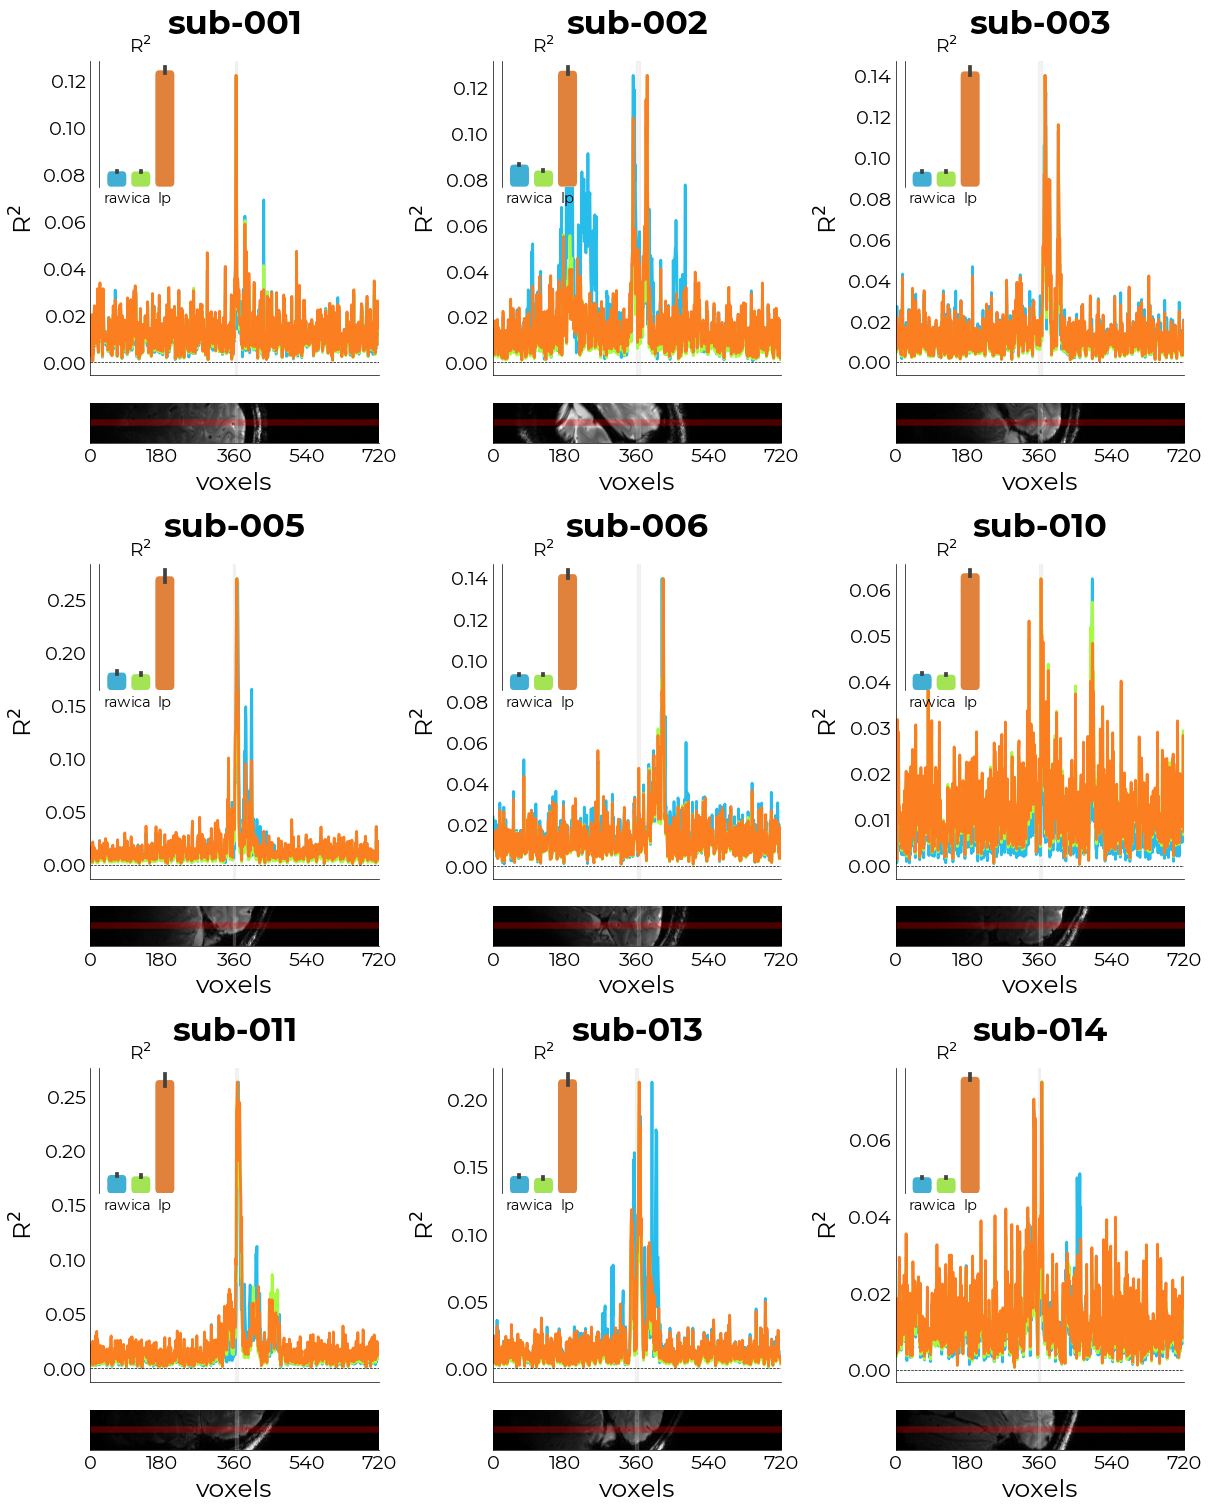

In [212]:
subj_obj = hr.utils.SubjectsDict()

subj_ids = subj_obj.get_subjects()
ncols = 3
nrows = int(np.ceil(len(subj_ids)/ncols))

fig = plt.figure(figsize=(ncols*4,nrows*5), constrained_layout=True)
sf = fig.subfigures(
    ncols=ncols, 
    nrows=nrows
)

for ix,ax in enumerate(sf.flatten()):

    if (ix+1)<=len(subj_ids):
        
        sub = subj_ids[ix]
        print(f"Plotting {sub}")

        imgs = {}
        ref_slc = subj_obj.get_slc(sub)
        ref_beam = subj_obj.get_beam(sub)
        for img,ff in zip(["slice","beam"],[ref_slc,ref_beam]):

            if isinstance(ff, str):
                imgs[img] = nb.load(ff).get_fdata().squeeze()
            else:
                raise TypeError(f"{ff} is of type {type(ff)}. Must be a string pointing to a path")
        # imgs
    
        axs = ax.subplots(
            nrows=2,
            sharex=True,
            height_ratios=[0.8,0.2],
            gridspec_kw={
                "hspace": -0.4
            }
        )
        
        cmap = "turbo" #utils.make_between_cm("white","red", as_list=True, N=5)[2:]
        select_sub = sub_glms[sub]
        r2_vals = []
        for key,val in select_sub.items():
            r2 = val.results["r2"]

            # scale by low-pass
            if key != "lp":
                r2 = (r2/max(r2))*max(select_sub["lp"].results["r2"])

            r2_vals.append(r2)

        pl = plotting.LazyPlot(
            r2_vals,
            axs=axs[0],
            y_label="R$^2$",
            # labels=list(select_sub.keys()),
            cmap=cmap,
            alpha=[0.3,0.8,1],
            line_width=2,
            add_hline=0,
            title={
                "title": sub,
                "fontweight": "bold"
            }
        )

        # plot r2 as bar in inset
        ax_inset = axs[0].inset_axes([0.05,0.6,0.25,0.4])
        dfs = []
        for ix,(key,val) in enumerate(select_sub.items()):
            r2 = val.results["r2"]
            df = pd.DataFrame(r2, columns=["r2"])
            df["stage"], df["ix"] = key, ix
            dfs.append(df)

        dfs = pd.concat(dfs)
        bar = plotting.LazyBar(
            dfs, 
            x="stage",
            y="r2",
            fancy=True,
            axs=ax_inset,
            add_labels=True,
            cmap=cmap,
            font_size=pl.font_size*0.75,
            label_size=pl.label_size*0.75,
            title_size=pl.title_size*0.75,
            sns_offset=4,
            ticks=[]
        )
        ax_inset.set_title(
            "R$^2$",
            fontsize=bar.font_size
        )

        for cm,cr,key,alpha in zip(
            ["Greys_r","r"],
            [False,True],
            list(imgs.keys()),
            [None,0.3]
            ):
            
            if cr:
                cm = utils.make_binary_cm(cm)

            im = axs[1].imshow(
                np.rot90(imgs[key])[310:410,:],
                cmap=cm,
                alpha=alpha
            )

        plotting.conform_ax_to_obj(
            ax=axs[1],
            y_ticks=[],
            x_label="voxels",
            x_ticks=np.linspace(0,imgs[key].shape[1],5, dtype=int)
        )

        for ax in axs:
            ax.axvspan(
                *subj_obj.get_ribbon(sub), 
                alpha=0.2, 
                color="#cccccc"
            )
# hr.viz._save_figure(fig, fname="group_desc-epochs_subjects") #, overwrite=True)

Plotting sub-001
Plotting sub-002
Plotting sub-003
Plotting sub-005
Plotting sub-006
Plotting sub-010
Plotting sub-011
Plotting sub-013
Plotting sub-014


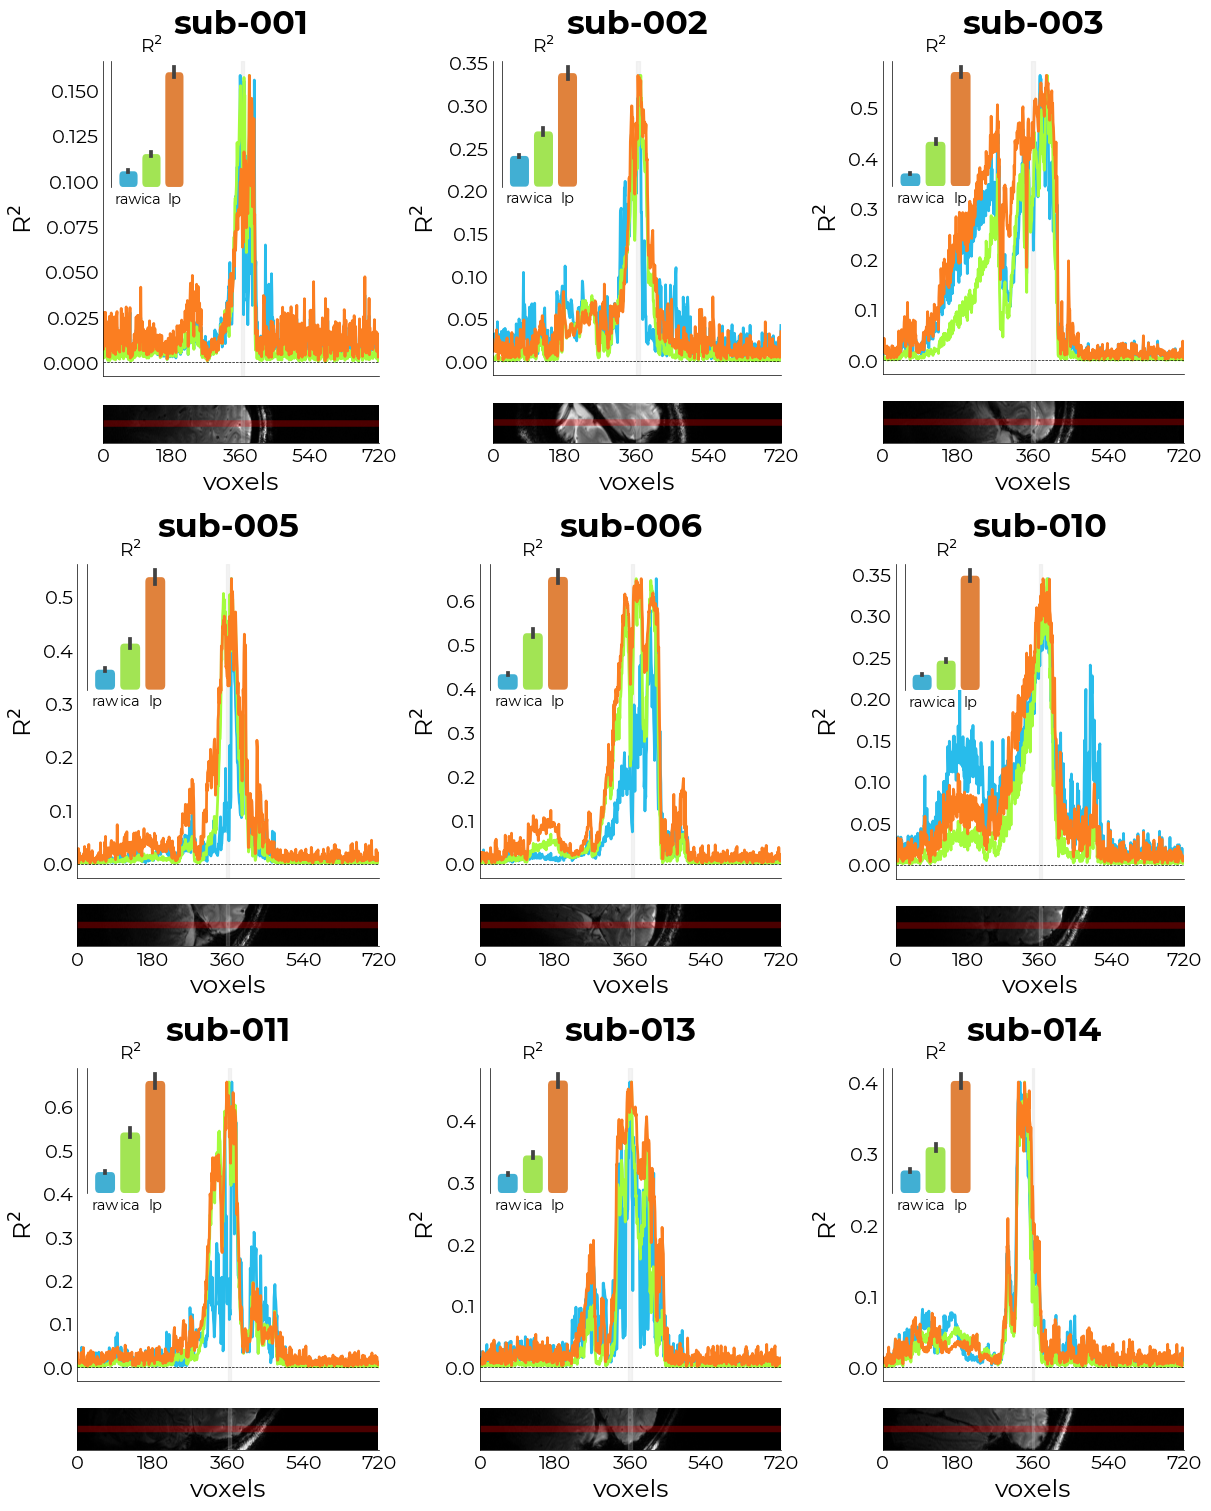

In [126]:
subj_obj = hr.utils.SubjectsDict()

subj_ids = subj_obj.get_subjects()
ncols = 3
nrows = int(np.ceil(len(subj_ids)/ncols))

fig = plt.figure(figsize=(ncols*4,nrows*5), constrained_layout=True)
sf = fig.subfigures(
    ncols=ncols, 
    nrows=nrows
)

for ix,ax in enumerate(sf.flatten()):

    if (ix+1)<=len(subj_ids):
        
        sub = subj_ids[ix]
        print(f"Plotting {sub}")

        imgs = {}
        ref_slc = subj_obj.get_slc(sub)
        ref_beam = subj_obj.get_beam(sub)
        for img,ff in zip(["slice","beam"],[ref_slc,ref_beam]):

            if isinstance(ff, str):
                imgs[img] = nb.load(ff).get_fdata().squeeze()
            else:
                raise TypeError(f"{ff} is of type {type(ff)}. Must be a string pointing to a path")
        # imgs
    
        axs = ax.subplots(
            nrows=2,
            sharex=True,
            height_ratios=[0.8,0.2],
            gridspec_kw={
                "hspace": -0.4
            }
        )
        
        cmap = "turbo" #utils.make_between_cm("white","red", as_list=True, N=5)[2:]
        select_sub = sub_glms[sub]
        r2_vals = []
        for key,val in select_sub.items():
            r2 = val.results["r2"]

            # scale by low-pass
            if key != "lp":
                r2 = (r2/max(r2))*max(select_sub["lp"].results["r2"])

            r2_vals.append(r2)

        pl = plotting.LazyPlot(
            r2_vals,
            axs=axs[0],
            y_label="R$^2$",
            # labels=list(select_sub.keys()),
            cmap=cmap,
            alpha=[0.3,0.8,1],
            line_width=2,
            add_hline=0,
            title={
                "title": sub,
                "fontweight": "bold"
            }
        )

        # plot r2 as bar in inset
        ax_inset = axs[0].inset_axes([0.05,0.6,0.25,0.4])
        dfs = []
        for ix,(key,val) in enumerate(select_sub.items()):
            r2 = val.results["r2"]
            df = pd.DataFrame(r2, columns=["r2"])
            df["stage"], df["ix"] = key, ix
            dfs.append(df)

        dfs = pd.concat(dfs)
        bar = plotting.LazyBar(
            dfs, 
            x="stage",
            y="r2",
            fancy=True,
            axs=ax_inset,
            add_labels=True,
            cmap=cmap,
            font_size=pl.font_size*0.75,
            label_size=pl.label_size*0.75,
            title_size=pl.title_size*0.75,
            sns_offset=4,
            ticks=[]
        )
        ax_inset.set_title(
            "R$^2$",
            fontsize=bar.font_size
        )

        for cm,cr,key,alpha in zip(
            ["Greys_r","r"],
            [False,True],
            list(imgs.keys()),
            [None,0.3]
            ):
            
            if cr:
                cm = utils.make_binary_cm(cm)

            im = axs[1].imshow(
                np.rot90(imgs[key])[310:410,:],
                cmap=cm,
                alpha=alpha
            )

        plotting.conform_ax_to_obj(
            ax=axs[1],
            y_ticks=[],
            x_label="voxels",
            x_ticks=np.linspace(0,imgs[key].shape[1],5, dtype=int)
        )

        for ax in axs:
            ax.axvspan(
                *subj_obj.get_ribbon(sub), 
                alpha=0.2, 
                color="#cccccc"
            )
# hr.viz._save_figure(fig, fname="group_desc-epochs_subjects") #, overwrite=True)

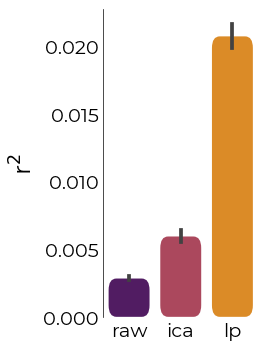

In [91]:
dfs = []
for ix,(key,val) in enumerate(select_sub.items()):
    r2 = val.results["r2"]
    df = pd.DataFrame(r2, columns=["r2"])
    df["stage"], df["ix"] = key, ix
    dfs.append(df)

dfs = pd.concat(dfs)
plotting.LazyBar(
    dfs, 
    x="stage",
    y="r2",
    fancy=True,
    figsize=(2,4),
    add_labels=True,
    y_label="r$^2$"
)
# [val.results["r2"] for key,val in select_sub.items()]

In [127]:
subj_obj = hr.utils.SubjectsDict()

imgs = {}
subj = "sub-001"
ref_slc = subj_obj.get_slc(subj)
ref_beam = subj_obj.get_beam(subj)
ref_beam
# for img,ff in zip(["slice","beam"],[ref_slc,ref_beam]):
#     imgs[img] = nb.load(ff).get_fdata().squeeze()
# imgs

'/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/sub-001/ses-3/func/sub-001_ses-3_task-SRFa_run-1_bold.nii.gz'

In [157]:
from linescanning import dataset
nord_files = utils.FindFiles(opj(subj_obj.proj_dir,"sub-003","ses-6_nonordic"), extension="mat").files
nord_obj = dataset.Dataset(
    nord_files,
    verbose=False,
    use_bids=True,
    TR=0.105,
    filter_strategy="lp"
)
excl_nord = h5_obj.exclude_runs(nord_obj.df_func_raw, "sub-003")

In [141]:
excl_nord.head()

vox 0      vox 1      vox 2      vox 3      vox 4  \
subject task run t                                                              
003     SRFa 1   0.000  20.452240  18.597185  26.202536  24.337957  12.346432   
                 0.105  13.295551  15.900990  11.100067  13.814583  21.659370   
                 0.210  10.144867  17.554428  17.743097  18.578007  13.903700   
                 0.315  18.539776  19.331169  18.579536   9.175493  16.748610   
                 0.420  18.638807  19.225952  18.945477  16.980749  18.107424   

                            vox 5      vox 6      vox 7      vox 8      vox 9  \
subject task run t                                                              
003     SRFa 1   0.000  24.321213  18.640577  16.739243  21.266092  23.519403   
                 0.105  21.457664  23.619713  13.551687  19.964592  21.281387   
                 0.210  11.961769  16.717224  16.702879  15.889376  14.179102   
                 0.315  23.534575  15.576476  12.758038  19.426910  19.580460   
                 0.420  15.670359  16.219381  12.436744  12.802004  17.502565   

                        ...    vox 710    vox 711    vox 712    vox 713  \
subject task run t      ...                                               
003     SRFa 1   0.000  ...  19.590530  20.283796  16.967506  17.321682   
                 0.105  ...  20.240900  22.564165  12.670953  21.006384   
                 0.210  ...   9.028965  24.463360  11.493226  20.261051   
                 0.315  ...  14.636427  16.394369  17.644070  19.809649   
                 0.420  ...  12.293612  21.851244  16.601273  12.254326   

                          vox 714    vox 715    vox 716    vox 717    vox 718  \
subject task run t                                                              
003     SRFa 1   0.000  20.150089  20.422401  14.704233  15.679885  13.634868   
                 0.105  19.003727  16.267988  20.903587  11.614519  17.504044   
                 0.210  22.260506   9.073244  17.911711  14.039762  16.965511   
                 0.315  14.833086  26.804314   9.513515  14.729992  26.717392   
                 0.420  20.768778  21.761208  15.769121  17.418530  11.847267   

                          vox 719  
subject task run t                 
003     SRFa 1   0.000  14.984718  
                 0.105  28.098186  
                 0.210  16.684071  
                 0.315  27.761621  
                 0.420  13.736504  

[5 rows x 720 columns]

running GLM for sub-003
 ..raw
 ..raw+lp
 ..nordic
 ..ica
 ..lp


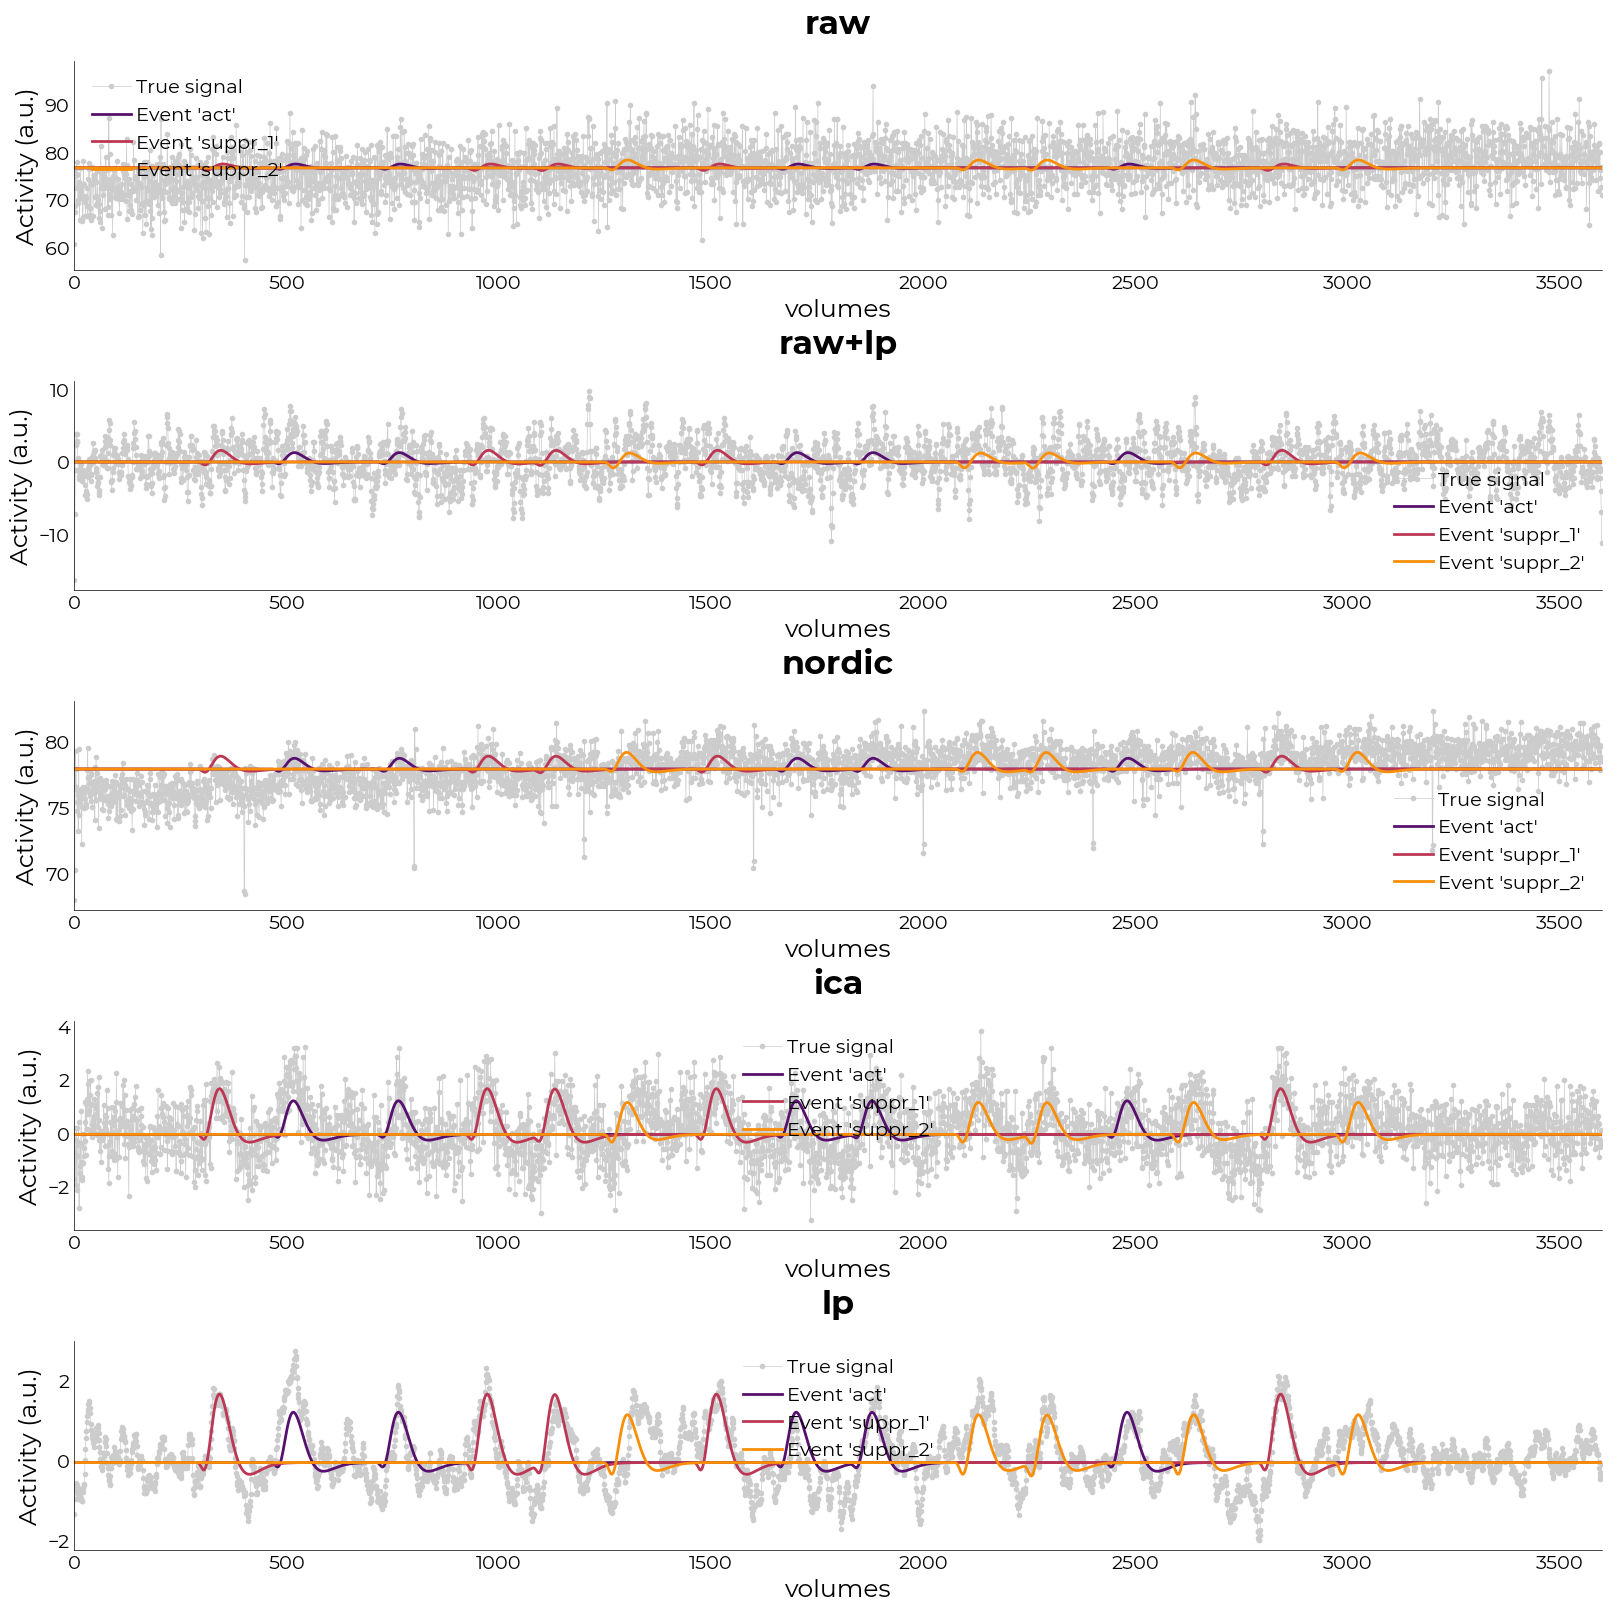

In [193]:
sub = "sub-003"
single_glm = {}
single_glm[sub] = {}
print(f"running GLM for {sub}")
expr = f"subject = {sub.split('-')[-1]}"

elements = ["raw","raw+lp","nordic","ica","lp"]
dataframes = [nord_obj.df_func_raw,nord_obj.df_func_psc,h5_obj.df_raw,h5_obj.df_orig,h5_obj.df_func]
fig, axs = plt.subplots(
    nrows=len(elements), 
    figsize=(16,16), 
    constrained_layout=True
)

for ix,(tag,df) in enumerate(zip(
    elements,
    dataframes)
    ):

    print(f" ..{tag}")

    df = utils.select_from_df(df, expression=expr)
    if tag not in ["lp"]:
        df = h5_obj.exclude_runs(df, sub)
    
    df = df.groupby(["subject","task","t"]).mean()
    sub_onsets = utils.select_from_df(df_stim, expression=expr)

    taskID = utils.get_unique_ids(df, id="task")[0]
    fit_line = glm.GenericGLM(
        utils.select_from_df(sub_onsets, expression=f"task = {taskID}"),
        utils.select_from_df(df, expression=f"task = {taskID}"), 
        hrf_pars="glover",
        derivative=True,
        TR=0.105, 
        osf=100, 
        add_intercept=add_icpt,
    )

    fit_line.create_design(add_intercept=add_icpt)
    fit_line.fit(
        copes=c_vec, 
        add_intercept=add_icpt,
        make_figure=True,
        axs=axs[ix],
        title={
            "title": tag,
            "fontweight": "bold"
        },
        plot_vox=372
    )

    single_glm[sub][tag] = fit_line #fit_line.results

Plotting sub-003


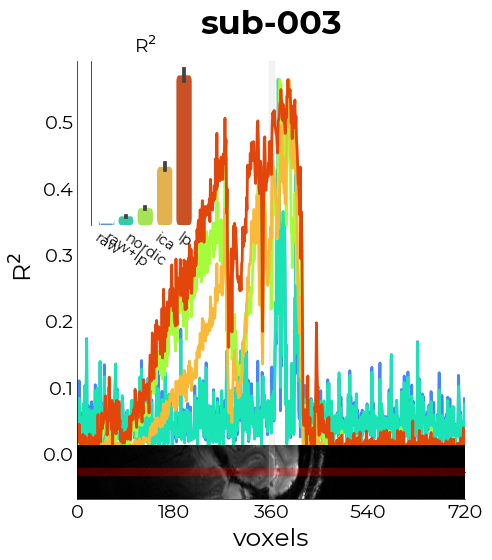

In [194]:
fig = plt.figure(figsize=(5,6))
ax = fig.subfigures()

sub = "sub-003"
print(f"Plotting {sub}")

imgs = {}
ref_slc = subj_obj.get_slc(sub)
ref_beam = subj_obj.get_beam(sub)
for img,ff in zip(["slice","beam"],[ref_slc,ref_beam]):

    if isinstance(ff, str):
        imgs[img] = nb.load(ff).get_fdata().squeeze()
    else:
        raise TypeError(f"{ff} is of type {type(ff)}. Must be a string pointing to a path")
# imgs

axs = ax.subplots(
    nrows=2,
    sharex=True,
    height_ratios=[0.8,0.2],
    gridspec_kw={
        "hspace": -0.2
    }
)

cmap = "turbo" #utils.make_between_cm("white","red", as_list=True, N=5)[2:]
select_sub = single_glm[sub]
r2_vals = []
for key,val in select_sub.items():
    r2 = val.results["r2"]

    # scale by low-pass
    if key != "lp":
        r2 = (r2/max(r2))*max(select_sub["lp"].results["r2"])

    r2_vals.append(r2)

pl = plotting.LazyPlot(
    r2_vals,
    axs=axs[0],
    y_label="R$^2$",
    # labels=list(select_sub.keys()),
    cmap=cmap,
    alpha=[0.3,0.8,1],
    line_width=2,
    add_hline=0,
    title={
        "title": sub,
        "fontweight": "bold"
    }
)

# plot r2 as bar in inset
ax_inset = axs[0].inset_axes([0.05,0.6,0.25,0.4])
dfs = []
for ix,(key,val) in enumerate(select_sub.items()):
    r2 = val.results["r2"]
    df = pd.DataFrame(r2, columns=["r2"])
    df["stage"], df["ix"] = key, ix
    dfs.append(df)

dfs = pd.concat(dfs)
bar = plotting.LazyBar(
    dfs, 
    x="stage",
    y="r2",
    fancy=True,
    axs=ax_inset,
    add_labels=True,
    cmap=cmap,
    font_size=pl.font_size*0.75,
    label_size=pl.label_size*0.75,
    title_size=pl.title_size*0.75,
    sns_offset=4,
    ticks=[],
    sns_rot=-35
)
ax_inset.set_title(
    "R$^2$",
    fontsize=bar.font_size
)

for cm,cr,key,alpha in zip(
    ["Greys_r","r"],
    [False,True],
    list(imgs.keys()),
    [None,0.3]
    ):
    
    if cr:
        cm = utils.make_binary_cm(cm)

    im = axs[1].imshow(
        np.rot90(imgs[key])[310:410,:],
        cmap=cm,
        alpha=alpha
    )

plotting.conform_ax_to_obj(
    ax=axs[1],
    y_ticks=[],
    x_label="voxels",
    x_ticks=np.linspace(0,imgs[key].shape[1],5, dtype=int)
)

for ax in axs:
    ax.axvspan(
        *subj_obj.get_ribbon(sub), 
        alpha=0.2, 
        color="#cccccc"
    )

In [33]:
fig,axs = plt.subplots(ncols=2, figsize=(10,5), constrained_layout=True)
plotting.LazyPlot(
    [t_line[i] for i,_ in enumerate(fit_line.plot_event)],
    axs=axs[0],
    x_label="voxels",
    y_label="tstats",
    labels=["center","far (2s)","far (4s)"],
    line_width=2,
    cmap="inferno",
    add_hline=0,
    title="t-stats across line"
)

plotting.LazyPlot(
    fit_line.results["r2"],
    axs=axs[1],
    x_label="voxels",
    y_label="variance explained",
    line_width=2,
    color="r",
    title="variance explained (full model)",
    add_hline=0
)

for ax in axs:
    ax.axvspan(*subj_obj.get_ribbon(subj), alpha=0.8, color="#cccccc")
    ax.axvspan(*subj_obj.get_wm(subj), alpha=0.3, color="#cccccc")

vox 0     vox 1     vox 2      vox 3      vox 4  \
subject task t                                                              
001     SRFb 0.000    12.503143  1.395119  4.826500  -8.340401  -3.953384   
             0.105    -4.917229 -1.312531 -3.687737 -10.783981   1.587334   
             0.210    -5.289284 -3.366066 -4.175667   0.543022  -0.437454   
             0.315     6.030251  3.013153 -3.542267   8.769402  12.368790   
             0.420     3.929909 -9.797684 -0.833893   5.892639  -1.684753   
...                         ...       ...       ...        ...        ...   
             377.475   5.482330  7.809082  6.052505   3.301643  -0.826881   
             377.580   3.326530 -0.125786  4.450996  -3.061890   4.154396   
             377.685   6.680321  7.516319 -0.324806   2.983704  -1.908211   
             377.790  -3.346344 -0.766266  2.548508  -3.693954   2.306168   
             377.895  -1.469009  5.125473 -5.522346   3.654327   3.161179   

                         vox 5      vox 6     vox 7     vox 8     vox 9  ...  \
subject task t                                                           ...   
001     SRFb 0.000   -0.289360   3.424210 -0.538353 -3.919228 -8.713730  ...   
             0.105   -8.628662  -1.422958  1.365593 -4.247391 -1.841232  ...   
             0.210    3.549538  -0.452766 -5.309578 -1.722626 -2.668808  ...   
             0.315    6.129951  11.828049 -1.286240 -5.104095 -4.920792  ...   
             0.420   -0.280769   0.181511  6.073822 -6.240280  2.307755  ...   
...                        ...        ...       ...       ...       ...  ...   
             377.475  0.942680   0.074646  7.524078  3.589844  7.948662  ...   
             377.580 -3.576645   5.859627 -1.344315 -1.556763  8.032120  ...   
             377.685 -0.143242   5.450645  2.575073  5.630402 -0.725105  ...   
             377.790  1.795158  -3.448578 -1.240974 -1.783081 -3.944656  ...   
             377.895  7.393341   5.446541  5.271507  1.374908  2.606789  ...   

                        vox 710    vox 711    vox 712    vox 713    vox 714  \
subject task t                                                                
001     SRFb 0.000    55.096710 -14.521378 -28.534744 -37.384586   9.007210   
             0.105    -4.902557 -30.477394  -3.989548  -4.157913  26.534073   
             0.210    61.338745  10.862541  -5.667091  11.621658   6.314903   
             0.315   -21.998680 -15.610054  -5.671722  -5.026146   8.650414   
             0.420    20.706596 -11.106773  11.989914 -11.083267 -25.671326   
...                         ...        ...        ...        ...        ...   
             377.475  -3.699310 -20.255516 -13.311882 -17.894951  15.680626   
             377.580  16.233292  -3.194611 -23.518227  23.727097 -42.120125   
             377.685  53.846466  41.930481 -32.662643  22.818993   3.916473   
             377.790 -20.592049  -0.625275  52.621788  25.899895 -17.643303   
             377.895 -22.567863  21.640152  30.913109  -4.298149  22.296112   

                        vox 715    vox 716    vox 717    vox 718    vox 719  
subject task t                                                               
001     SRFb 0.000    29.070877 -28.243332  32.618301  24.654106   6.982376  
             0.105    -4.974548  35.489838 -21.575378  40.793350 -24.322418  
             0.210    -6.084389  -5.998055  10.389168 -25.587059  53.176071  
             0.315    41.573357  -3.468201  30.135414   5.799889   7.690216  
             0.420   -27.174294  20.436485  19.643120  -8.063461   2.585968  
...                         ...        ...        ...        ...        ...  
             377.475   7.229584  -9.488937   4.171227  39.129898 -25.182434  
             377.580  45.465553 -21.189278 -21.188446 -22.328201  54.231766  
             377.685  26.130829  27.677605 -26.548164  13.423782 -32.482529  
             377.790  -6.593658   3.828316   3.543655 -17.796478 -37.649944  
             377.89